# 🏎️💨 **Welcome to the 2024 Formula 1 Season Analysis!** 📊

> 📁 **Notebook:** `2024F1season.analysis.ipynb`  
> 🎯 **Goal:** Dive deep into the drama, data, and dynamics of the 2024 Formula 1 season!

---

## 🔍 **What’s Inside?**

### 🗓️ **Season Calendar Overview**  
Track every Grand Prix weekend — from Bahrain to Abu Dhabi — with race dates and iconic circuits.

### 🏁 **Race Results & Championship Standings**  
Witness how each race shaped the title fight, driver standings, and team battles.

### 🧑‍🤝‍🧑 **Drivers & Teams**  
Meet the gladiators of the grid and the powerhouses behind the pit walls.

### ⏱️ **Qualifying vs Race Performance**  
Compare Saturday speed with Sunday strategy — who’s fastest and who’s consistent?

### 🚀 **Sprint Results Breakdown**  
Unpack the adrenaline of the sprint races — short, sharp, and full of surprises.

### 🏆 **Driver of the Day Trends**  
See who stole the hearts of fans and earned the spotlight throughout the season.

### 🏎️ **Team Performance Insights**  
Break down constructor consistency, development gains, and mid-season shifts.

### ✨ **Key Moments & Season Highlights**  
From shocking DNFs to underdog podiums — relive the defining events of 2024.

---

📘 This notebook is your **ultimate pit stop** for understanding the **2024 Formula 1 season** in all its high-octane glory! 🔥🏆


In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from matplotlib import cm
from matplotlib.colors import ListedColormap
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

import warnings
warnings.filterwarnings('ignore')



In [322]:
calendar_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_calendar.csv")
driver_of_day_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_driverOfTheDayVotes.csv")
drivers_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_drivers.csv")
qualifying_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_qualifyingResults.csv")
race_results_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_raceResults.csv")
sprint_qualifying_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_sprintQualifyingResults.csv")
sprint_results_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_sprintResults.csv")
teams_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_teams.csv")

In [323]:
# Preview:
{
    "calendar_df": calendar_df.head(3),
    "driver_of_day_df": driver_of_day_df.head(3),
    "drivers_df": drivers_df.head(3),
    "qualifying_df": qualifying_df.head(3),
    "race_results_df": race_results_df.head(3),
    "sprint_qualifying_df": sprint_qualifying_df.head(3),
    "sprint_results_df": sprint_results_df.head(3),
    "teams_df": teams_df.head(3)
}


{'calendar_df':    Round   Race Date               GP Name       Country       City  \
 0      1  02/03/2024   Gulf Air Bahrain GP       Bahrain     Sakhir   
 1      2  09/03/2024  STC Saudi Arabian GP  Saudi Arabia     Jeddah   
 2      3  24/03/2024   Rolex Australian GP     Australia  Melbourne   
 
                      Circuit Name  First GP  Number of Laps  \
 0   Bahrain International Circuit      2004              57   
 1         Jeddah Corniche Circuit      2021              50   
 2  Albert Park Grand Prix Circuit      1996              58   
 
    Circuit Length(km)  Race Distance(km) Lap Record      Record Owner  \
 0               5.412            308.238   1:31.447  Pedro de la Rosa   
 1               6.174            308.450   1:30.734    Lewis Hamilton   
 2               5.278            306.124   1:19.813   Charles Leclerc   
 
    Record Year  Turns  DRS Zones  
 0         2005     15          3  
 1         2021     27          3  
 2         2024     14         

In [324]:
calendar_df.columns

Index(['Round', 'Race Date', 'GP Name', 'Country', 'City', 'Circuit Name',
       'First GP', 'Number of Laps', 'Circuit Length(km)', 'Race Distance(km)',
       'Lap Record', 'Record Owner', 'Record Year', 'Turns', 'DRS Zones'],
      dtype='object')

In [325]:
driver_of_day_df.columns

Index(['Track', '1st Place', '1st Place(%)', '2nd Place', '2nd Place(%)',
       '3rd Place', '3rd Place(%)', '4th Place', '4th Place(%)', '5th Place',
       '5th Place(%)'],
      dtype='object')

In [326]:
drivers_df.columns

Index(['Driver', 'Abbreviation', 'No', 'Team', 'Country', 'Podiums', 'Points',
       'Grands Prix Entered', 'World Championships', 'Highest Race Finish',
       'Highest Grid Position', 'Date of Birth', 'Place of Birth'],
      dtype='object')

In [327]:
qualifying_df.columns

Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Q1', 'Q2', 'Q3', 'Laps'], dtype='object')

In [328]:
race_results_df.columns

Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps',
       'Time/Retired', 'Points', 'Set Fastest Lap', 'Fastest Lap Time'],
      dtype='object')

In [329]:
sprint_qualifying_df.columns

Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Q1', 'Q2', 'Q3', 'Laps'], dtype='object')

In [330]:
sprint_results_df.columns

Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps',
       'Time/Retired', 'Points'],
      dtype='object')

In [331]:
teams_df.columns

Index(['Team', 'Full Team Name', 'Base', 'Team Chief', 'Technical Chief',
       'Chassis', 'Power Unit', 'First Team Entry', 'World Championships',
       'Highest Race Finish', 'Pole Positions', 'Fastest Laps'],
      dtype='object')

In [332]:
teams_df

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
0,McLaren,McLaren Formula 1 Team,"Woking, United Kingdom",Andrea Stella,Peter Prodromou / Neil Houldey,MCL38,Mercedes,1966,9,1(x189),164,172
1,Ferrari,Scuderia Ferrari HP,"Maranello, Italy",Frédéric Vasseur,Loic Serra / Enrico Gualtieri,SF-24,Ferrari,1950,16,1(x249),253,263
2,Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christian Horner,Pierre Waché,RB20,Honda RBPT,1997,6,1(x122),103,99
3,Mercedes,Mercedes-AMG Petronas F1 Team,"Brackley, United Kingdom",Toto Wolff,James Allison,W15,Mercedes,1970,8,1(x120),133,100
4,Aston Martin,Aston Martin Aramco F1 Team,"Silverstone, United Kingdom",Mike Crack,Bob Bell,AMR24,Mercedes,2018,0,1(x1),1,3
5,Alpine,BWT Alpine F1 Team,"Enstone, United Kingdom",Oliver Oakes,David Sanchez,A524,Renault,1986,2,1(x21),20,16
6,Haas,MoneyGram Haas F1 Team,"Kannapolis, United States",Ayao Komatsu,Andrea De Zordo,VF-24,Ferrari,2016,0,4(x1),1,3
7,RB,Visa Cash App RB Formula One Team,"Faenza, Italy",Laurent Mekies,Jody Egginton,VCARB 01,Honda RBPT,1985,0,1(x2),1,4
8,Williams,Williams Racing,"Grove, United Kingdom",James Vowles,Pat Fry,FW46,Mercedes,1978,9,1(x114),128,133
9,Kick Sauber,Stake F1 Team Kick Sauber,"Hinwil, Switzerland",Alessandro Alunni Bravi,James Key,C44,Ferrari,1993,0,1(x1),1,7


## 🧑‍🏁 Driver & Constructor Performance Analysis

In this section, we evaluate key performance indicators for both drivers and teams throughout the 2024 Formula 1 season. The analysis includes:

- 🏆 **Wins, Podiums, Fastest Laps, and Pole Positions** for each driver
- 📊 **Consistency** based on the standard deviation of race finishing positions
- 🏁 **Final Driver and Constructor Standings** based on total points
- 📈 **Bar Charts** visualizing top drivers and team performances

### 🔧 Data Preparation

We start by ensuring position and qualifying times are properly converted to numeric formats to facilitate statistical operations.

### 🏁 Driver Statistics

Using race and qualifying data, we compute:
- **Wins**: Count of 1st-place finishes
- **Podiums**: Count of top 3 finishes
- **Fastest Laps**: Based on a 'Set Fastest Lap' flag
- **Pole Positions**: Based on best Q3 qualifying times per track

A summary DataFrame is created to consolidate this information, with missing values filled as zero.

### 📉 Consistency Metric

We calculate the **standard deviation of finishing positions** to quantify consistency across races for each driver—lower values indicate more consistent results.

### 🏆 Final Standings

- **Driver Standings**: Aggregated total points per driver.
- **Constructor Standings**: Aggregated total points per team.

### 📊 Visualizations

We generate bar plots for:
- **Top 10 Drivers** by total points
- **Constructor Standings**

### 🏁 Champions & Highlights

Finally, we print out:
- The **World Champion** (highest total points)
- The **Constructors' Champion**
- A sorted list of **Top Performing Drivers** by number of wins


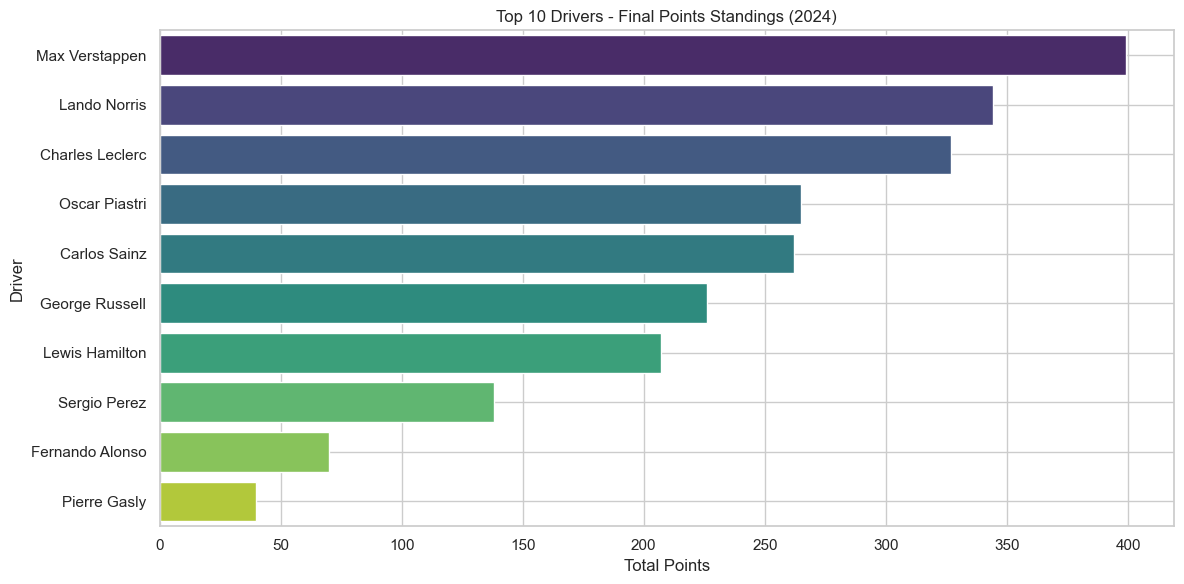

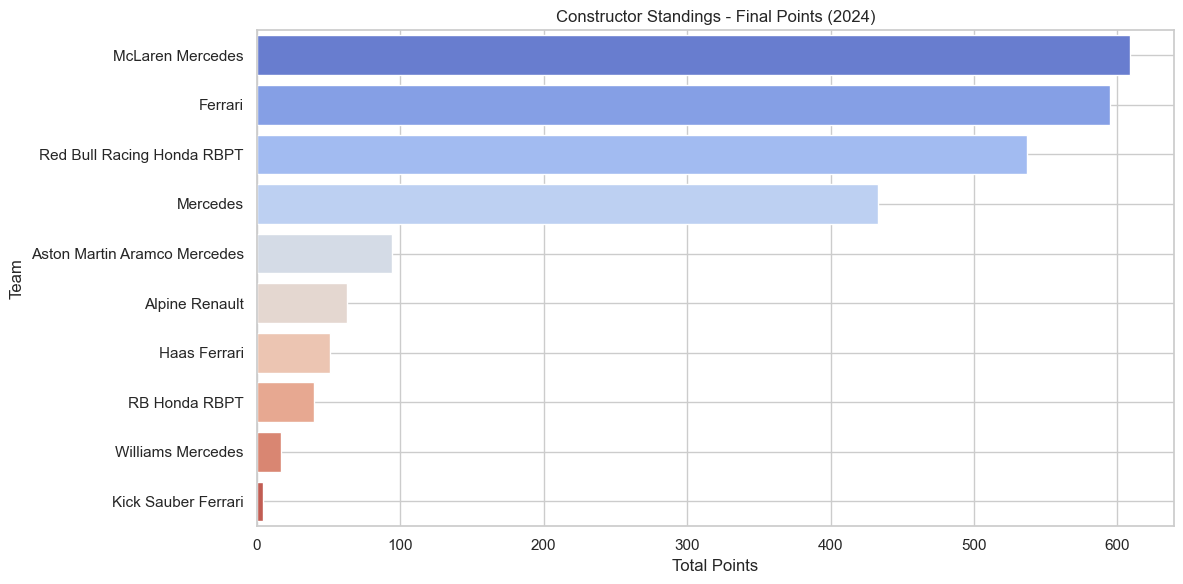

🏆 World Champion: Max Verstappen
🏆 Constructors' Champion: McLaren Mercedes

Top Drivers by Wins:


,Wins,Podiums,Fastest Laps,Poles,Consistency (std dev)
Max Verstappen,9,14,0,0,2.06
Lando Norris,4,13,0,0,4.08
Charles Leclerc,3,13,0,0,3.00
Oscar Piastri,2,8,0,0,3.11
George Russell,2,4,0,0,3.22


In [334]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

race_results_df['Position'] = pd.to_numeric(race_results_df['Position'], errors='coerce')

# Ensure Q3 column is numeric
qualifying_df['Q3'] = pd.to_numeric(qualifying_df['Q3'], errors='coerce')

# --- Driver Stats Aggregation ---
wins = race_results_df[race_results_df['Position'] == 1].groupby('Driver').size()
podiums = race_results_df[race_results_df['Position'] <= 3].groupby('Driver').size()
fastest_laps = race_results_df[race_results_df['Set Fastest Lap'] == True].groupby('Driver').size()

# Poles from Q3 times
poles = qualifying_df.groupby('Track').apply(
    lambda x: x.loc[x['Q3'].idxmin(), 'Driver'] if x['Q3'].notna().any() else None
).value_counts()

# --- Build Driver Stats DataFrame ---
all_drivers = sorted(race_results_df['Driver'].dropna().unique())
driver_stats = pd.DataFrame(index=all_drivers)
driver_stats['Wins'] = wins
driver_stats['Podiums'] = podiums
driver_stats['Fastest Laps'] = fastest_laps
driver_stats['Poles'] = poles
driver_stats = driver_stats.fillna(0).astype(int)

# Consistency (Standard deviation of race positions)
consistency = race_results_df.dropna(subset=['Position']).groupby('Driver')['Position'].std()
driver_stats['Consistency (std dev)'] = consistency.round(2)

# --- Final Standings ---
final_points = race_results_df.groupby('Driver')['Points'].sum().sort_values(ascending=False)
final_driver_standings = final_points.reset_index().rename(columns={'Points': 'Total Points'})

team_points = race_results_df.groupby('Team')['Points'].sum().sort_values(ascending=False)
final_constructor_standings = team_points.reset_index().rename(columns={'Points': 'Total Points'})

# --- Visualization: Top 10 Drivers ---
plt.figure(figsize=(12, 6))
sns.barplot(data=final_driver_standings.head(10), x='Total Points', y='Driver', palette='viridis')
plt.title("Top 10 Drivers - Final Points Standings (2024)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Visualization: Constructor Standings ---
plt.figure(figsize=(12, 6))
sns.barplot(data=final_constructor_standings, x='Total Points', y='Team', palette='coolwarm')
plt.title("Constructor Standings - Final Points (2024)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Champion Summary ---
print("🏆 World Champion:", final_driver_standings.iloc[0]['Driver'])
print("🏆 Constructors' Champion:", final_constructor_standings.iloc[0]['Team'])

# --- Top Performing Drivers ---
print("\nTop Drivers by Wins:")
display(driver_stats.sort_values(by='Wins', ascending=False).head())


## 🏁 Race Wins & Podiums Analysis

This section focuses on quantifying driver success during the 2024 Formula 1 season by evaluating:

- **🏆 Total Race Wins**: Number of races each driver won (finished 1st)
- **🥉 Total Podiums**: Number of times a driver finished in the top 3

### 🔄 Data Cleaning

To ensure accurate analysis:
- The race results DataFrame is copied and cleaned.
- Race positions are coerced to numeric to handle any inconsistencies in the data.

### 📊 Driver Statistics

Using the cleaned race results:
- The **number of wins** is calculated by counting occurrences of Position = 1.
- The **number of podiums** is calculated by counting results where Position ≤ 3.

These metrics are then merged with the master `drivers_df` to form a comprehensive summary.

### 📈 Visualizations

Two bar charts are generated to provide a clear comparison of:
1. **Total Race Wins** for each driver.
2. **Total Podium Finishes**, showcasing consistent top performers across the season.

Drivers are sorted in descending order for better interpretability.


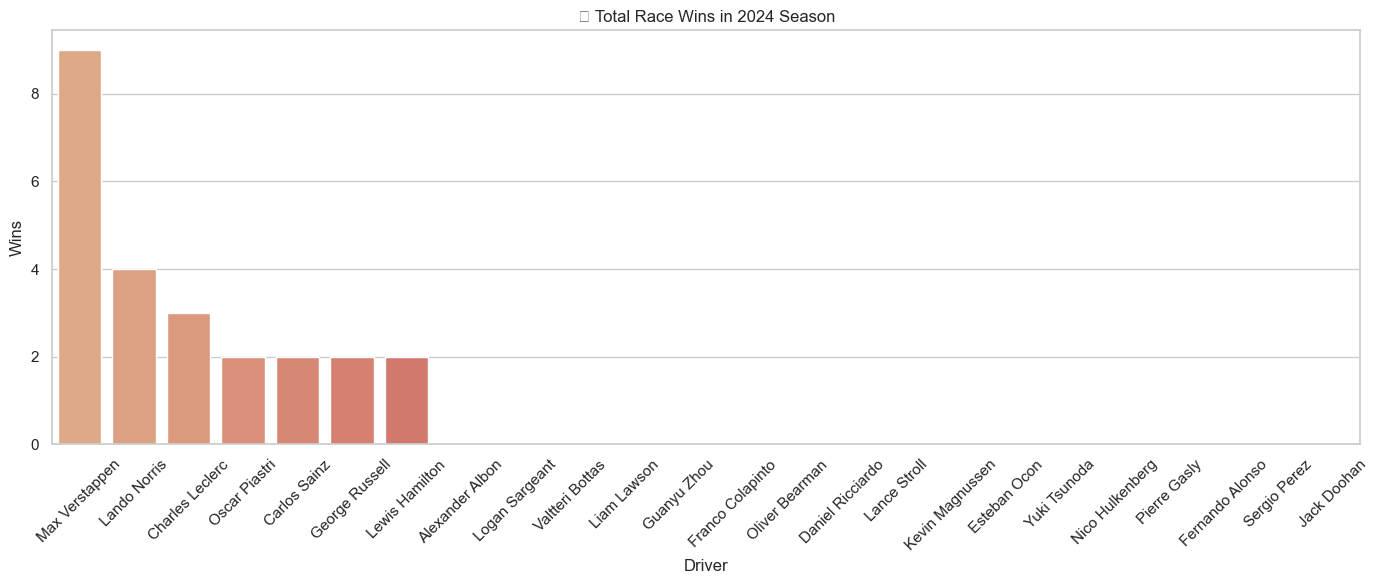

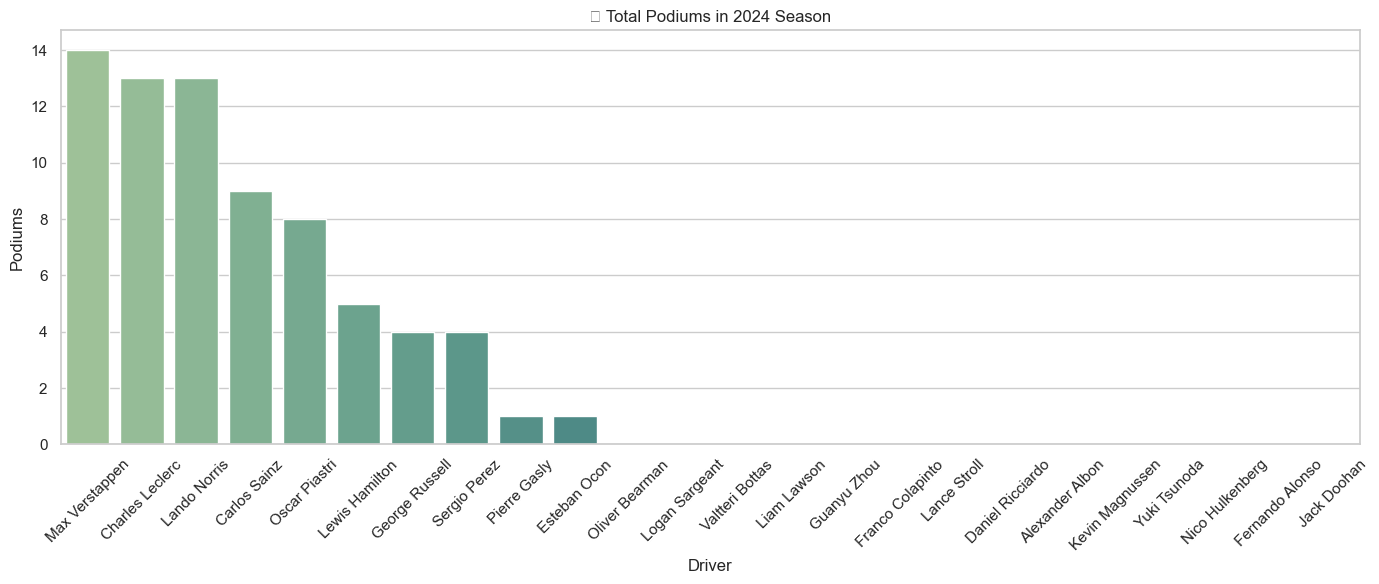

In [336]:
race_results_df_clean = race_results_df.copy()
race_results_df_clean['Position'] = pd.to_numeric(race_results_df_clean['Position'], errors='coerce')

# Total Wins
race_winners = race_results_df_clean[race_results_df_clean['Position'] == 1]['Driver'].value_counts()

# Total Podiums (1st to 3rd)
podium_counts = race_results_df_clean[race_results_df_clean['Position'] <= 3]['Driver'].value_counts()

# Merge with drivers data
driver_summary = pd.DataFrame(index=drivers_df['Driver'])
driver_summary['Wins'] = race_winners
driver_summary['Podiums'] = podium_counts
driver_summary = driver_summary.fillna(0).astype(int).reset_index()

# Plot total race wins
plt.figure(figsize=(14, 6))
sns.barplot(data=driver_summary.sort_values('Wins', ascending=False),
            x='Driver', y='Wins', palette='flare')
plt.title("🏆 Total Race Wins in 2024 Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot total podiums
plt.figure(figsize=(14, 6))
sns.barplot(data=driver_summary.sort_values('Podiums', ascending=False),
            x='Driver', y='Podiums', palette='crest')
plt.title("🥉 Total Podiums in 2024 Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ⚙️ Power Unit Distribution Among Teams

This section provides a breakdown of the **power unit (engine) manufacturers** used by Formula 1 teams during the 2024 season.

### 🔍 Objective

Each team uses a specific engine supplier (e.g., Mercedes, Ferrari, Honda, Renault). Understanding the distribution helps identify:
- The dominance of particular manufacturers
- Trends in technical partnerships across the grid

### 📊 Visualization

A **pie chart** is created using the `teams_df` dataset to:
- Show the percentage share of each power unit manufacturer
- Highlight which manufacturers supply engines to multiple teams

Pastel colors are used for a clean, distinguishable visual, and the chart is set to equal aspect ratio for accuracy.


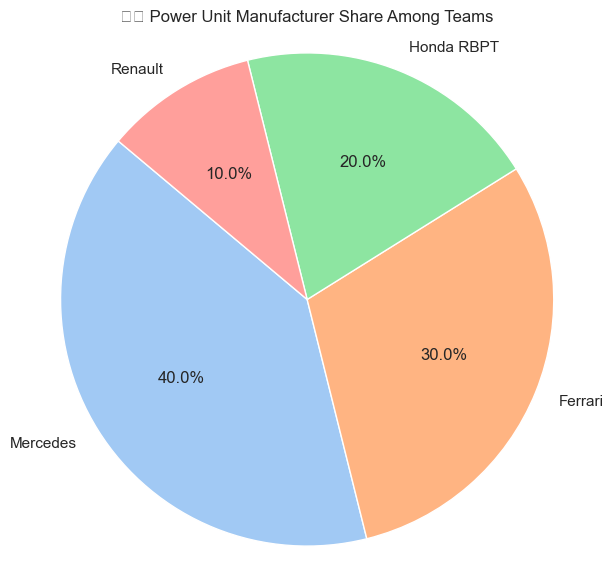

In [338]:
#Power Unit Distribution
plt.figure(figsize=(7, 7))
power_unit_counts = teams_df["Power Unit"].value_counts()
plt.pie(power_unit_counts, labels=power_unit_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("⚙️ Power Unit Manufacturer Share Among Teams")
plt.axis('equal')
plt.show()


## 🌍 Team Base Locations Distribution

This section analyzes the geographical distribution of Formula 1 teams based on their **registered base locations** (usually where their factories or headquarters are located).

### 🏭 Purpose

Understanding where teams are based offers insight into:
- The **geographical concentration** of F1 operations
- Engineering hubs and motorsport infrastructure centers (e.g., the UK "Motorsport Valley")
- Global footprint of team logistics and R&D efforts

### 📊 Visualization

A **pie chart** is used to represent the proportion of teams headquartered in various countries or cities. This visualization helps to highlight:
- Clusters of teams in specific regions
- How global (or centralized) the F1 ecosystem is in 2024

Colors are styled with a pastel palette for readability, and the chart is normalized to a circle using `axis('equal')`.


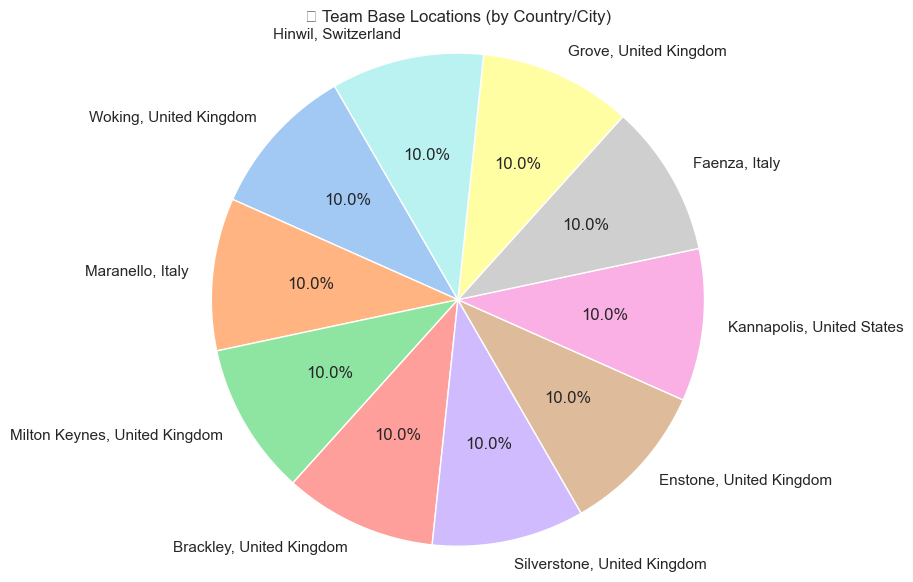

In [340]:
#Teams by Country Base
plt.figure(figsize=(7, 7))
base_counts = teams_df["Base"].value_counts()
plt.pie(base_counts, labels=base_counts.index, autopct='%1.1f%%', startangle=120, colors=sns.color_palette("pastel"))
plt.title("🌍 Team Base Locations (by Country/City)")
plt.axis('equal')
plt.show()


## 🏆 Who Won the 2024 F1 World Championship?

This section determines the **2024 Formula 1 Drivers' World Champion** by calculating and visualizing the total points accumulated by each driver over the season.

### 📐 Methodology

- The `race_results_df` is grouped by driver, summing all points scored across the season.
- Drivers are then **ranked** based on total points in descending order.

### 📊 Visualization

A **horizontal bar chart** is plotted to clearly show the points distribution:
- The chart makes it easy to identify the top-performing driver.
- A cool-to-warm color palette highlights the difference between high and low scorers.
- Gridlines improve readability across the x-axis.

This plot visually answers the question: **Who was the 2024 World Champion?**


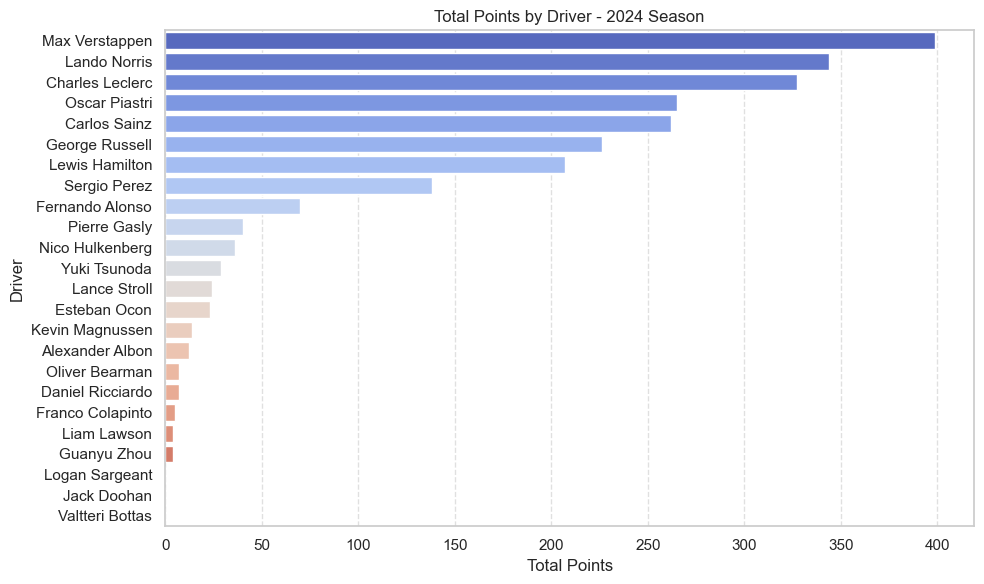

In [342]:
driver_points = race_results_df.groupby("Driver")["Points"].sum().reset_index()
driver_points = driver_points.sort_values(by="Points", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=driver_points, x="Points", y="Driver", palette="coolwarm")
plt.title("Total Points by Driver - 2024 Season")
plt.xlabel("Total Points")
plt.ylabel("Driver")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 🏆 Which Team Won the Constructors’ Championship?

This section identifies the winner of the **2024 Constructors' Championship** by analyzing which team accumulated the most points over the season.

### 📐 Methodology

- The dataset `race_results_df` is grouped by `Team`.
- Points from all races and both drivers per team are summed to get the **total team score**.
- The result is sorted to rank teams from highest to lowest points.

### 📊 Visualization

A **horizontal bar chart** is used to display the total points earned by each constructor:
- This clearly highlights the most dominant team in terms of performance and consistency.
- The `viridis` color palette helps distinguish performance tiers.
- Gridlines and axis labels improve readability.

This analysis reveals the **Constructors' Champion of 2024** and provides insight into overall team competitiveness.


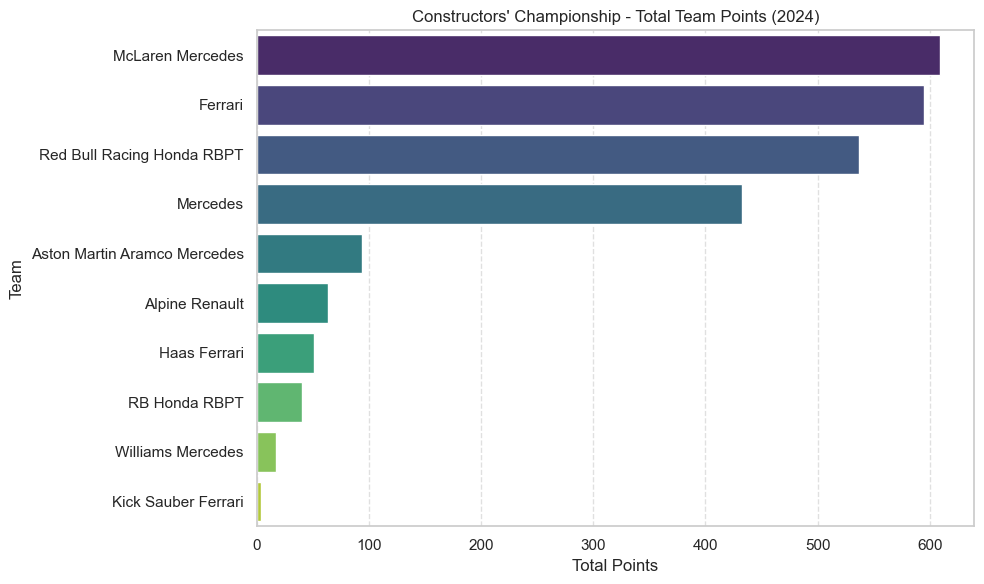

In [344]:
#Which team won the Constructors’ Championship?
team_points = race_results_df.groupby("Team")["Points"].sum().reset_index()
team_points = team_points.sort_values(by="Points", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=team_points, x="Points", y="Team", palette="viridis")
plt.title("Constructors' Championship - Total Team Points (2024)")
plt.xlabel("Total Points")
plt.ylabel("Team")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 🧑‍🏁 Driver Performance Summary – Key Metrics

This section aggregates and visualizes several critical statistics that define driver performance over the 2024 F1 season.

### 📊 Metrics Tracked

- **Wins**: Number of races won by each driver.
- **Podiums**: Total finishes in the top 3.
- **Poles**: Number of times a driver secured P1 in qualifying sessions.
- **Fastest Laps**: Count of fastest laps recorded during races.

### 🧮 Methodology

- All metrics are computed using grouped counts from `race_results_df` and `qualifying_df`.
- Data is consolidated into a single DataFrame for comparison.
- Any missing values are filled with 0, and data is sorted by number of wins.

### 🔍 Visualization

A **horizontal bar chart** shows the comparative performance of drivers across these four metrics:
- Color-coded bars make it easy to interpret multiple stat categories.
- Gridlines and labels enhance clarity.
- Sorted by **Wins** to emphasize race-winning ability.

This visualization gives a well-rounded snapshot of **driver dominance and consistency** in the 2024 season.


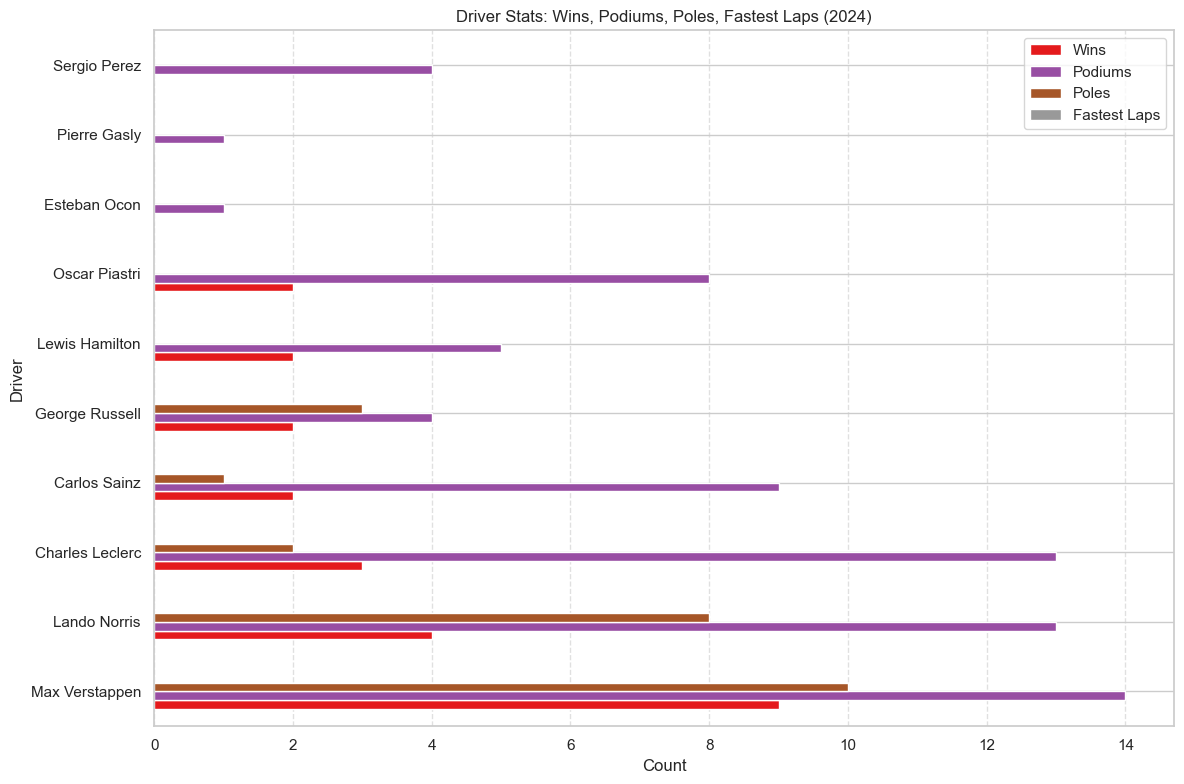

In [346]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Position columns to numeric to allow comparison operations
race_results_df["Position"] = pd.to_numeric(race_results_df["Position"], errors='coerce')
qualifying_df["Position"] = pd.to_numeric(qualifying_df["Position"], errors='coerce')

# Wins and podiums
wins = race_results_df[race_results_df["Position"] == 1].groupby("Driver").size().rename("Wins")
podiums = race_results_df[race_results_df["Position"] <= 3].groupby("Driver").size().rename("Podiums")

# Poles from qualifying
poles = qualifying_df[qualifying_df["Position"] == 1].groupby("Driver").size().rename("Poles")

# Fastest laps
fastest_laps = race_results_df[race_results_df["Set Fastest Lap"] == True].groupby("Driver").size().rename("Fastest Laps")

# Merge all stats into one DataFrame
performance_summary = pd.concat([wins, podiums, poles, fastest_laps], axis=1).fillna(0).astype(int)
performance_summary = performance_summary.sort_values(by="Wins", ascending=False)

# Plot the results
performance_summary.plot(kind="barh", figsize=(12, 8), colormap="Set1")
plt.title("Driver Stats: Wins, Podiums, Poles, Fastest Laps (2024)")
plt.xlabel("Count")
plt.ylabel("Driver")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 📏 Driver Consistency Analysis

How consistent were the top drivers throughout the 2024 Formula 1 season? This section investigates the **variability in finishing positions** to reveal which drivers maintained steady performances and which ones had fluctuating results.

### 🔍 Methodology

- The `Position` column is converted to numeric to ensure proper statistical computation.
- We identify the **top 10 drivers** based on total championship points.
- For each top driver, we compute the **standard deviation of their race finishing positions**.
  - A **lower standard deviation** indicates a more consistent performance across races.
  - A **higher value** suggests inconsistency—frequent shifts in race outcomes.

### 📊 Visualization

A **horizontal bar chart** displays the standard deviation of race finishes for each of the top 10 drivers:

- **Drivers are sorted** by increasing standard deviation.
- This makes it easy to identify the most consistent driver at the top.
- Gridlines and labeling improve interpretability.

This metric provides valuable insight beyond wins and podiums—highlighting drivers who reliably performed at a high level race after race.


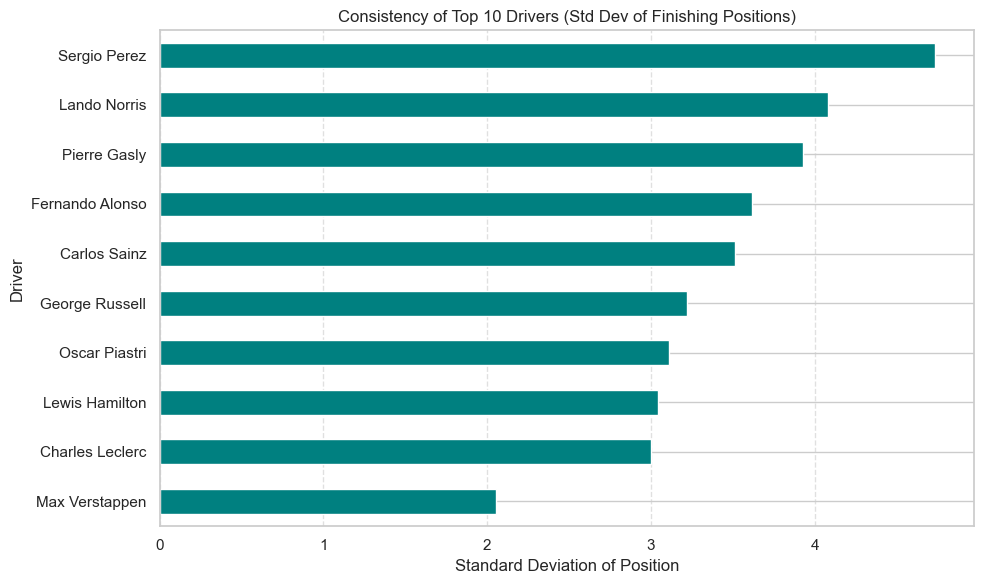

In [348]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Position is numeric, convert invalid values (like 'NC') to NaN
race_results_df["Position"] = pd.to_numeric(race_results_df["Position"], errors='coerce')

# Select top 10 drivers by total points
top_drivers = race_results_df.groupby("Driver")["Points"].sum().nlargest(10).index

# Compute std deviation of finishing positions for top drivers
consistency = (race_results_df[race_results_df["Driver"].isin(top_drivers)]
               .groupby("Driver")["Position"]
               .std()
               .sort_values())

# Plot
plt.figure(figsize=(10, 6))
consistency.plot(kind="barh", color="teal")
plt.title("Consistency of Top 10 Drivers (Std Dev of Finishing Positions)")
plt.xlabel("Standard Deviation of Position")
plt.ylabel("Driver")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## 🏁 Final Driver and Constructor Standings – Explanation

- The dataset is first grouped by **Driver**, and the total **Points** scored by each driver across all races is calculated.

- The resulting driver totals are then sorted in **descending order** to determine the final driver standings, from highest to lowest points.

- Similarly, the dataset is grouped by **Team**, and total **Points** are summed for each constructor.

- The teams are also sorted in **descending order** to get the final constructor standings.

- Finally, both the **driver** and **constructor standings** are printed to display the season-end rankings.


In [350]:
# Final driver standings
driver_standings = race_results_df.groupby("Driver")["Points"].sum().reset_index()
driver_standings = driver_standings.sort_values(by="Points", ascending=False).reset_index(drop=True)

# Final team standings
team_standings = race_results_df.groupby("Team")["Points"].sum().reset_index()
team_standings = team_standings.sort_values(by="Points", ascending=False).reset_index(drop=True)

# Show both
print("Driver Standings:\n", driver_standings)
print("\nConstructor Standings:\n", team_standings)


Driver Standings:
               Driver  Points
0     Max Verstappen     399
1       Lando Norris     344
2    Charles Leclerc     327
3      Oscar Piastri     265
4       Carlos Sainz     262
5     George Russell     226
6     Lewis Hamilton     207
7       Sergio Perez     138
8    Fernando Alonso      70
9       Pierre Gasly      40
10   Nico Hulkenberg      36
11      Yuki Tsunoda      29
12      Lance Stroll      24
13      Esteban Ocon      23
14   Kevin Magnussen      14
15   Alexander Albon      12
16    Oliver Bearman       7
17  Daniel Ricciardo       7
18  Franco Colapinto       5
19       Liam Lawson       4
20       Guanyu Zhou       4
21    Logan Sargeant       0
22       Jack Doohan       0
23   Valtteri Bottas       0

Constructor Standings:
                            Team  Points
0              McLaren Mercedes     609
1                       Ferrari     595
2    Red Bull Racing Honda RBPT     537
3                      Mercedes     433
4  Aston Martin Aramco Mercedes

## 📈 Average Positions Gained Per Race – Explanation

- The columns **"Starting Grid"** and **"Position"** are converted to numeric values. Any invalid entries (e.g., strings or missing values) are turned into `NaN` to prevent errors during calculation.

- A new column, **"Positions Gained"**, is created by subtracting the race finish position from the starting grid position. This tells how many places each driver gained (or lost) in a race.

- The data is then grouped by **Driver**, and the average number of **positions gained per race** is computed for each driver.

- The results are sorted in **descending order** to highlight the drivers with the best average racecraft (i.e., overtaking ability).

- A **horizontal bar plot** is generated using Seaborn to visually display the average positions gained per driver for the 2024 season.

- The plot includes gridlines for readability and labels for clarity.


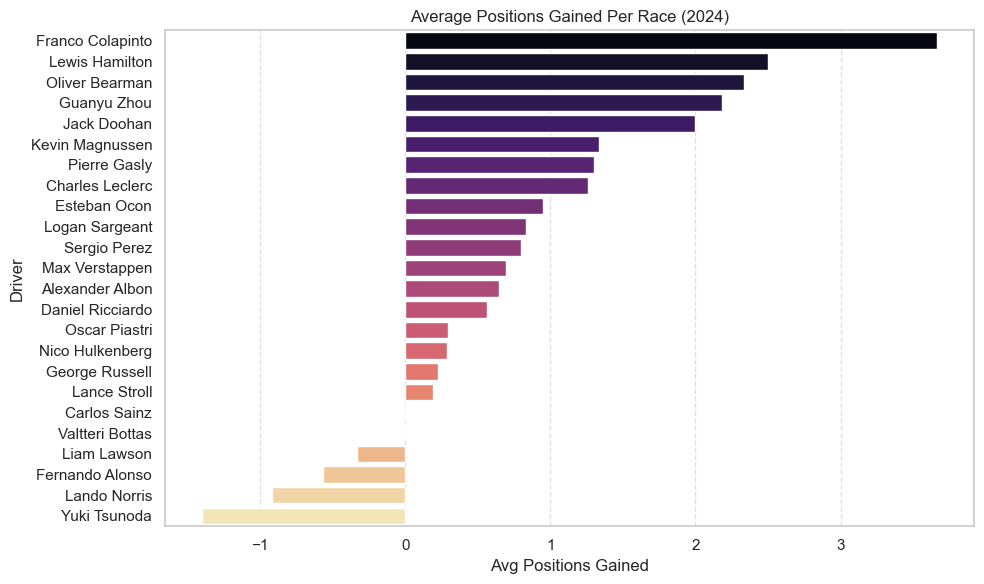

In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to numeric (invalid strings become NaN)
race_results_df["Starting Grid"] = pd.to_numeric(race_results_df["Starting Grid"], errors='coerce')
race_results_df["Position"] = pd.to_numeric(race_results_df["Position"], errors='coerce')

# Compute position gains
race_results_df["Positions Gained"] = race_results_df["Starting Grid"] - race_results_df["Position"]

# Average positions gained per race per driver
racecraft = race_results_df.groupby("Driver")["Positions Gained"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=racecraft.values, y=racecraft.index, palette="magma")
plt.title("Average Positions Gained Per Race (2024)")
plt.xlabel("Avg Positions Gained")
plt.ylabel("Driver")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## ⚖️ Qualifying vs Race Performance – Explanation

- The **"Position"** column from both the `qualifying_df` and `race_results_df` is converted to numeric, with invalid entries safely set to `NaN` to avoid processing errors.

- The **average qualifying position** is calculated for each driver by grouping the qualifying results by **Driver** and computing the mean position.

- Similarly, the **average race position** is calculated for each driver from the race results.

- Both averages are combined into a single DataFrame to directly compare qualifying and race performance per driver.

- A new column **"Delta"** is added, calculated as:  
  `Avg Qualifying Position - Avg Race Position`  
  - A **positive delta** means the driver typically **improved during the race** compared to their qualifying position.  
  - A **negative delta** means the driver often **dropped positions** in the race.

- The drivers are sorted by this delta value and visualized in a **bar plot** to show which drivers tend to outperform (or underperform) their qualifying positions during the actual races.

- A vertical dashed line at 0 marks the point where qualifying and race performance are equal, helping to interpret improvement or decline visually.


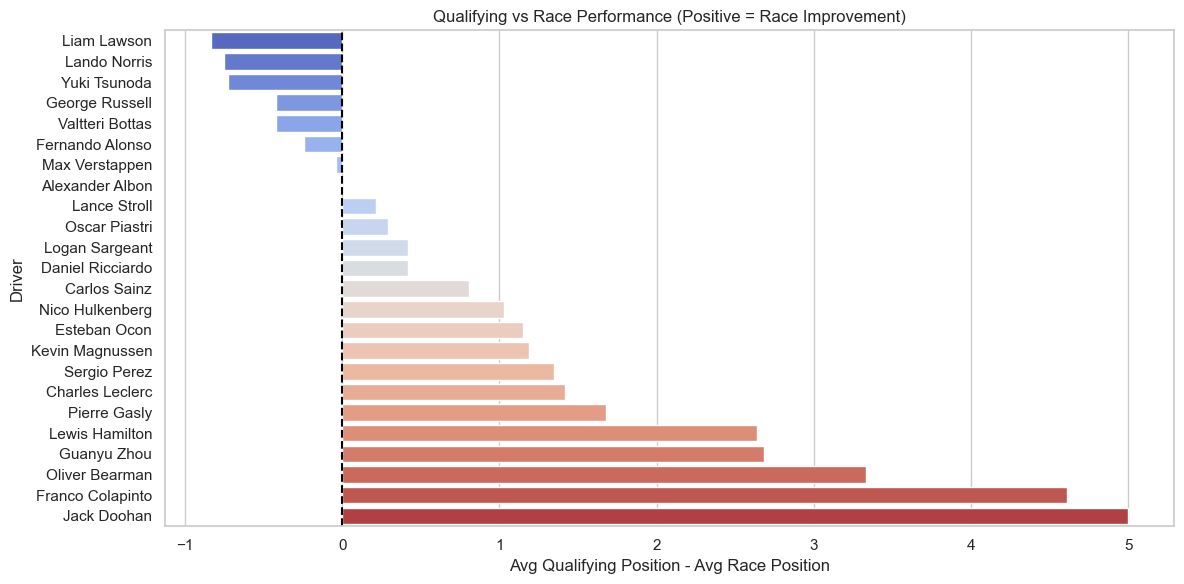

In [354]:
# Convert Position columns to numeric, forcing errors to NaN (so invalid entries won't break)
qualifying_df["Position"] = pd.to_numeric(qualifying_df["Position"], errors='coerce')
race_results_df["Position"] = pd.to_numeric(race_results_df["Position"], errors='coerce')

# Now groupby and calculate average qualifying position
avg_qual = qualifying_df.groupby("Driver")["Position"].mean().rename("Avg Qualifying")

# Average race position
avg_race = race_results_df.groupby("Driver")["Position"].mean().rename("Avg Race")

# Combine and compute performance delta
qual_vs_race = pd.concat([avg_qual, avg_race], axis=1).dropna()
qual_vs_race["Delta"] = qual_vs_race["Avg Qualifying"] - qual_vs_race["Avg Race"]

# Plot
qual_vs_race_sorted = qual_vs_race.sort_values(by="Delta")
plt.figure(figsize=(12, 6))
sns.barplot(data=qual_vs_race_sorted, x="Delta", y=qual_vs_race_sorted.index, palette="coolwarm")
plt.axvline(0, color='black', linestyle='--')
plt.title("Qualifying vs Race Performance (Positive = Race Improvement)")
plt.xlabel("Avg Qualifying Position - Avg Race Position")
plt.ylabel("Driver")
plt.tight_layout()
plt.show()


## 📊 Most Improved Drivers vs 2023 – Explanation

- A placeholder DataFrame (`points_2023`) is created to represent each driver's total points from the **2023 season**.  
  *(In practice, this should be replaced with actual 2023 race results.)*

- The total points for each driver in **2024** are calculated by grouping the current season’s race results by **Driver** and summing their **Points**.

- The 2023 and 2024 points are **merged** into a single DataFrame on the **Driver** column, so the point totals can be directly compared.

- A new column, **"Improvement"**, is calculated as:  
  `Points_2024 - Points_2023`  
  - A higher value indicates greater improvement in performance compared to the previous season.

- The drivers are **sorted** by this improvement metric in descending order to highlight those who gained the most points compared to last year.

- A **bar plot** is generated to visualize the improvement in driver performance between 2023 and 2024, making it easy to see who made the biggest leap forward.


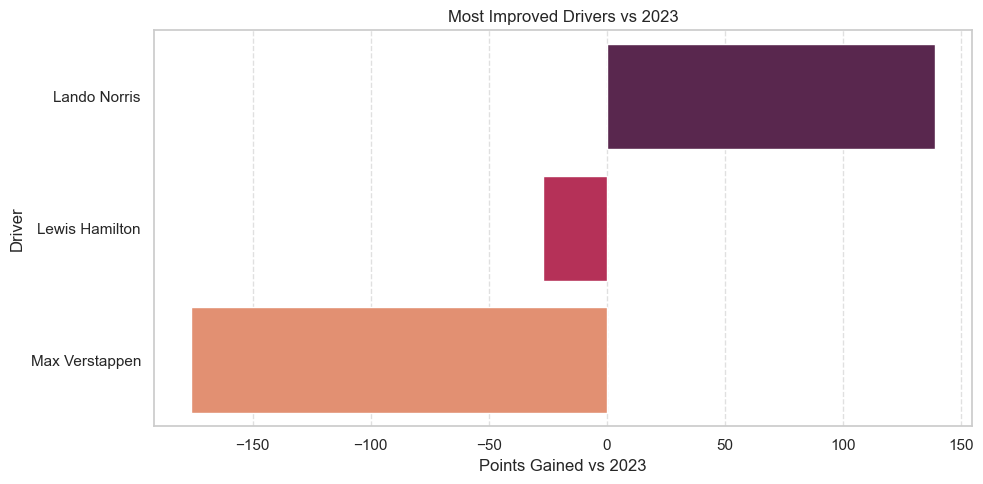

In [356]:
points_2023 = pd.DataFrame({
    "Driver": ["Max Verstappen", "Lewis Hamilton", "Lando Norris"],
    "Points_2023": [575, 234, 205]
})

# 2024 points
points_2024 = race_results_df.groupby("Driver")["Points"].sum().reset_index(name="Points_2024")

# Merge and compute improvement
delta = pd.merge(points_2024, points_2023, on="Driver", how="inner")
delta["Improvement"] = delta["Points_2024"] - delta["Points_2023"]

# Plot
delta = delta.sort_values(by="Improvement", ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data=delta, x="Improvement", y="Driver", palette="rocket")
plt.title("Most Improved Drivers vs 2023")
plt.xlabel("Points Gained vs 2023")
plt.ylabel("Driver")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 🏆 Most Dominant Driver Across All Sessions – Explanation

- The number of **race wins** (1st place finishes) is counted by filtering the race results where the finishing **Position** equals 1 and grouping by **Driver**.

- Similarly, the number of **sprint wins** is counted from the sprint session results where **Position** equals 1, grouped by driver.

- The number of **pole positions** (1st place in qualifying) is counted from the qualifying data by filtering **Position** equal to 1 and grouping by driver.

- These three counts (race wins, sprint wins, poles) are combined into a single DataFrame, filling any missing values with zero and converting counts to integers.

- A new column, **"Total Dominance"**, sums all first-place finishes across the three session types for each driver.

- The drivers are sorted by their total dominance in descending order to identify the most dominant driver of the 2024 season.

- A stacked horizontal bar chart is plotted to visually represent the number of wins and poles for each driver, showing their dominance across race, sprint, and qualifying sessions.

- The plot includes gridlines and clear axis labels for better readability.


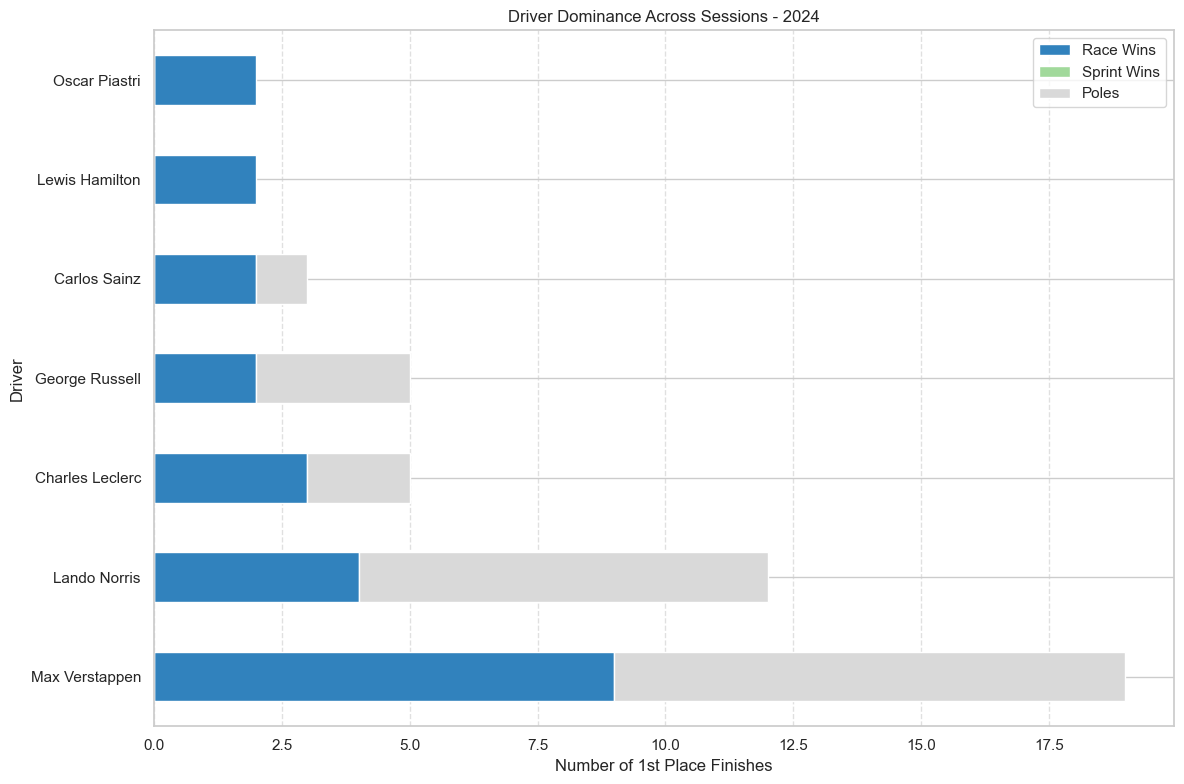

In [358]:
# Count number of 1st place finishes across race, sprint, qualifying
race_wins = race_results_df[race_results_df["Position"] == 1].groupby("Driver").size().rename("Race Wins")
sprint_wins = sprint_results_df[sprint_results_df["Position"] == 1].groupby("Driver").size().rename("Sprint Wins")
qual_poles = qualifying_df[qualifying_df["Position"] == 1].groupby("Driver").size().rename("Poles")

# Combine
dominance = pd.concat([race_wins, sprint_wins, qual_poles], axis=1).fillna(0).astype(int)
dominance["Total Dominance"] = dominance.sum(axis=1)
dominance = dominance.sort_values(by="Total Dominance", ascending=False)

# Plot
dominance[["Race Wins", "Sprint Wins", "Poles"]].plot(kind="barh", stacked=True, figsize=(12, 8), colormap="tab20c")
plt.title("Driver Dominance Across Sessions - 2024")
plt.xlabel("Number of 1st Place Finishes")
plt.ylabel("Driver")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


## 🎯 Best Average Qualifying Position – Explanation

- The average qualifying position is calculated for each driver by grouping the qualifying data by **Driver** and computing the mean of their qualifying **Position**.

- The resulting averages are sorted in ascending order since a lower qualifying position indicates better performance.

- A horizontal bar plot is created to visualize the average qualifying positions of drivers in the 2024 season.

- The plot highlights which drivers consistently qualified closer to the front of the grid.

- Gridlines and clear axis labels improve readability and interpretation of the plot.


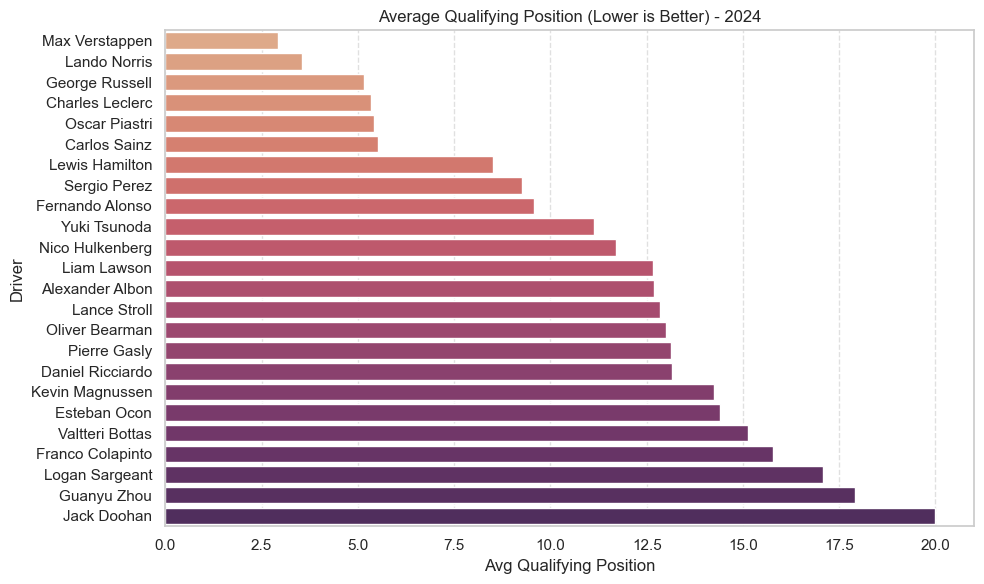

In [360]:
# Average qualifying position for each driver
qualifying_avg = qualifying_df.groupby("Driver")["Position"].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=qualifying_avg.values, y=qualifying_avg.index, palette="flare")
plt.title("Average Qualifying Position (Lower is Better) - 2024")
plt.xlabel("Avg Qualifying Position")
plt.ylabel("Driver")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 🔄 Influence of Sprint Races on Main Race Outcomes – Explanation

- A helper function is used to convert the **Position** columns in both sprint and race results to numeric types, coercing invalid entries to `NaN` for clean data processing.

- The sprint and race DataFrames are merged on both **Track** and **Driver** to align each driver's sprint position with their corresponding race position on the same track.

- Rows with missing position data (`NaN`) in either sprint or race positions are dropped to ensure accurate analysis.

- The **Pearson correlation coefficient** between sprint and race positions is calculated to quantify the relationship, showing how strongly a driver's sprint performance predicts their race outcome.

- A scatter plot visualizes this relationship, plotting sprint positions against race positions for each driver, with different colors representing individual drivers.

- The plot includes gridlines and axis labels for clarity, helping to interpret how sprint race results influence final race positions in the 2024 season.


Correlation between Sprint and Race Position: 0.64


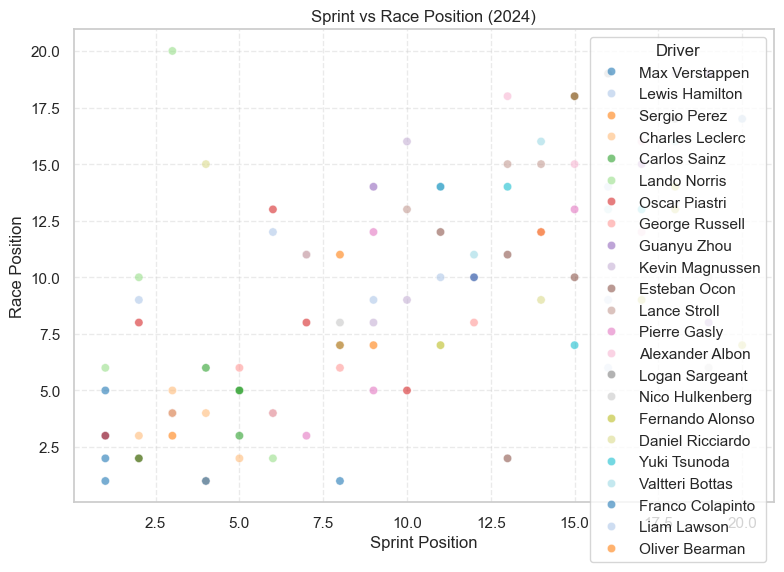

In [362]:
#How did sprint races influence main race outcomes?
def clean_position_column(df, col_name, new_col_name):
    df[new_col_name] = pd.to_numeric(df[col_name], errors='coerce')  # non-convertible -> NaN
    return df

# Clean sprint_results_df
sprint_results_df = clean_position_column(sprint_results_df, "Position", "Sprint Position")

# Clean race_results_df
race_results_df = clean_position_column(race_results_df, "Position", "Race Position")

# Now merge on Track and Driver with cleaned position columns
sprint_vs_race = pd.merge(
    sprint_results_df[["Track", "Driver", "Sprint Position"]],
    race_results_df[["Track", "Driver", "Race Position"]],
    on=["Track", "Driver"]
).dropna(subset=["Sprint Position", "Race Position"])  # drop rows where positions are NaN

# Calculate correlation
correlation = sprint_vs_race["Sprint Position"].corr(sprint_vs_race["Race Position"])
print(f"Correlation between Sprint and Race Position: {correlation:.2f}")

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sprint_vs_race, x="Sprint Position", y="Race Position", hue="Driver", palette="tab20", alpha=0.6)
plt.title("Sprint vs Race Position (2024)")
plt.xlabel("Sprint Position")
plt.ylabel("Race Position")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


## ❓ Surprising Q1/Q2/Q3 Knockouts and Unexpected Pole Sitters – Explanation

- Drivers who were **eliminated in Q1** are identified by filtering qualifying results where **Position > 15**, and their knockout counts are tallied by driver.

- The count of Q1 knockouts per driver is used as a measure of frequent early exits in qualifying.

- The **top 5 drivers by total points** in the race results are identified to establish the strongest performers.

- Pole sitters who are **not in the top 5** by points are flagged as **unexpected poles**, highlighting surprising qualifying performances.

- A bar plot is created to visualize drivers with frequent Q1 knockouts during the 2024 season, focusing on those with multiple eliminations.

- The total number of Q1 exits per driver is printed to show the frequency of early qualifying eliminations.

- A table listing unexpected pole sitters along with the tracks where they achieved pole position is displayed to highlight notable surprises in qualifying sessions.


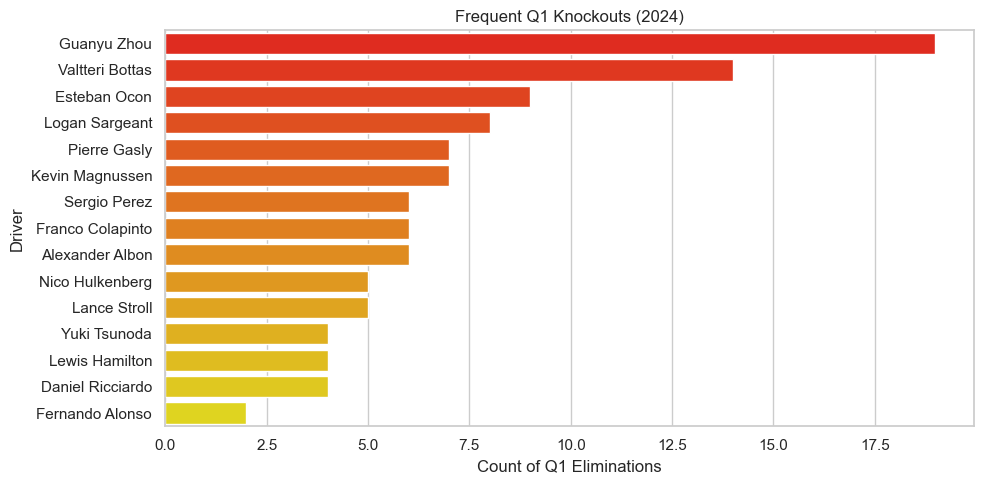

Number of Q1 Exits by Driver:
Driver
Guanyu Zhou         19
Valtteri Bottas     14
Esteban Ocon         9
Logan Sargeant       8
Pierre Gasly         7
Kevin Magnussen      7
Sergio Perez         6
Franco Colapinto     6
Alexander Albon      6
Lance Stroll         5
Nico Hulkenberg      5
Yuki Tsunoda         4
Lewis Hamilton       4
Daniel Ricciardo     4
Fernando Alonso      2
George Russell       1
Lando Norris         1
Oscar Piastri        1
Oliver Bearman       1
Liam Lawson          1
Jack Doohan          1
Name: count, dtype: int64

Unexpected Pole Sitters (Not in Top 5 in Points):


,Track,Driver
159,Canada,George Russell
219,Great Britain,George Russell
418,Las Vegas,George Russell


In [364]:
# Count Q1 knockouts (Position > 15 means eliminated in Q1)
q1_knockouts = qualifying_df[qualifying_df["Position"] > 15]["Driver"].value_counts()

# Also get total Q1 exits count per driver (same as knockouts here)
q1_exits = q1_knockouts.copy()

# Unexpected poles (drivers not in top 5 by total points)
top5 = race_results_df.groupby("Driver")["Points"].sum().nlargest(5).index
unexpected_poles = qualifying_df[(qualifying_df["Position"] == 1) & (~qualifying_df["Driver"].isin(top5))]

# Plot Q1 knockouts
plt.figure(figsize=(10, 5))
q1_knockouts = q1_knockouts[q1_knockouts > 1]  # Filter to frequent knockouts
sns.barplot(x=q1_knockouts.values, y=q1_knockouts.index, palette="autumn")
plt.title("Frequent Q1 Knockouts (2024)")
plt.xlabel("Count of Q1 Eliminations")
plt.ylabel("Driver")
plt.tight_layout()
plt.show()

# Display number of Q1 exits per driver
print("Number of Q1 Exits by Driver:")
print(q1_exits.sort_values(ascending=False))

# Show table of unexpected pole sitters (with Track instead of Round)
print("\nUnexpected Pole Sitters (Not in Top 5 in Points):")
display(unexpected_poles[["Track", "Driver"]])


## 🏎️ Team Average Points Per Race – Explanation

- The total points scored by each team are summed across all races.

- The number of unique tracks (used as a proxy for the number of race rounds) is counted.

- The team’s total points are divided by the number of races to calculate the **average points per race** for each team.

- The teams are sorted by this average in descending order to identify which team scored the most points on average per race.

- A horizontal bar plot visualizes the average points per race for each team during the 2024 season.

- Gridlines and axis labels are added for clarity and easy interpretation of team performance.


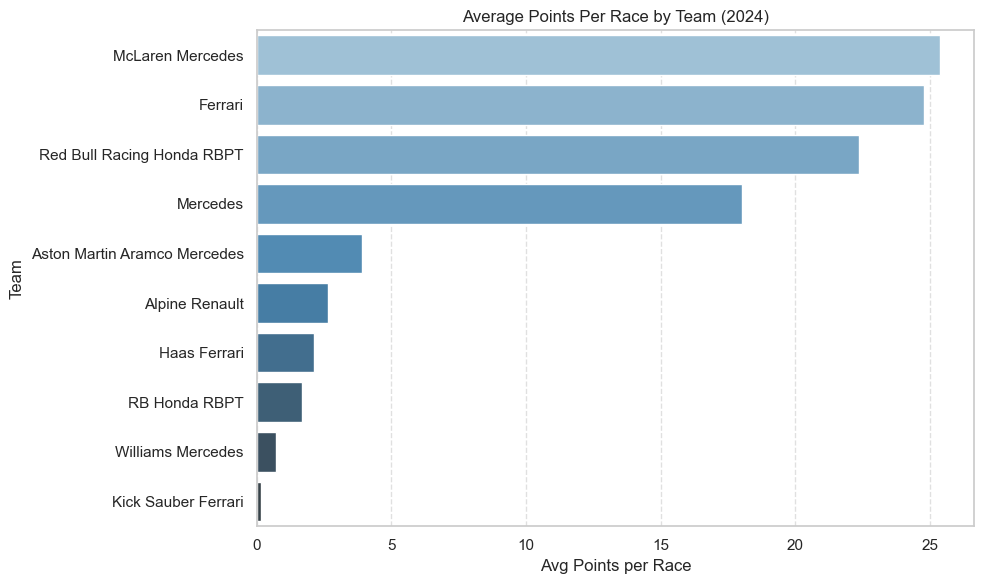

In [366]:
# Team average points per race (using Track as proxy for rounds)
team_avg_points = race_results_df.groupby("Team")["Points"].sum() / race_results_df["Track"].nunique()
team_avg_points = team_avg_points.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=team_avg_points.values, y=team_avg_points.index, palette="Blues_d")
plt.title("Average Points Per Race by Team (2024)")
plt.xlabel("Avg Points per Race")
plt.ylabel("Team")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## ⚡ Midfield Teams Punching Above Their Weight – Explanation

- Total points scored by each team are calculated and sorted to identify team rankings.

- The teams ranked 4th to 7th (index 3 to 6) are considered **midfield teams** for this analysis.

- Race results are filtered to find **podium finishes** (positions 1, 2, or 3) achieved by these midfield teams.

- The number of podium finishes per midfield team is counted.

- A horizontal bar plot visualizes how many podiums each midfield team secured during the 2024 season.

- This helps highlight which midfield teams performed exceptionally well relative to their overall standings.


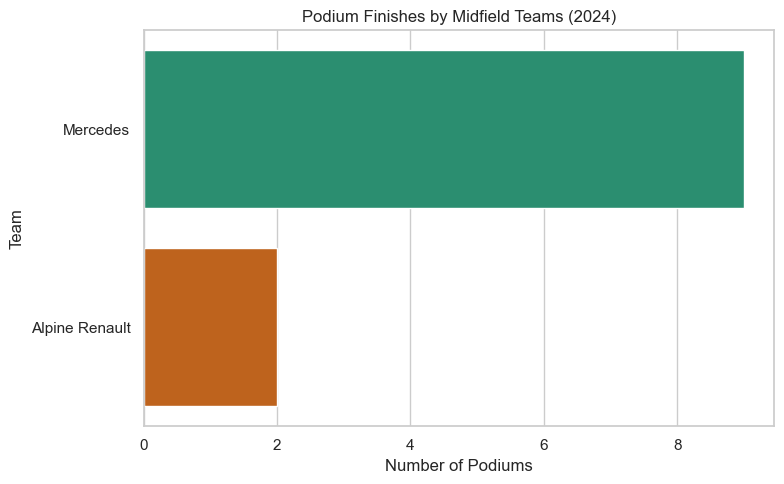

In [368]:
# Total points per team (sorted)
team_total_points = race_results_df.groupby("Team")["Points"].sum().sort_values(ascending=False).reset_index()
midfield_teams = team_total_points.iloc[3:7]["Team"].values

# Filter for podium finishes (P1, P2, P3)
podiums = race_results_df[(race_results_df["Position"] <= 3) & (race_results_df["Team"].isin(midfield_teams))]

# Count podiums per midfield team
midfield_podiums = podiums["Team"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=midfield_podiums.values, y=midfield_podiums.index, palette="Dark2")
plt.title("Podium Finishes by Midfield Teams (2024)")
plt.xlabel("Number of Podiums")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


## 🏎️ Races with Most Overtakes or Drama – Explanation

- Convert the "Position" and "Starting Grid" columns to numeric values to ensure accurate calculations.

- Remove rows where either position data is missing to maintain data integrity.

- Calculate the position change for each driver by subtracting their race finishing position from their starting grid position. A positive value means positions gained, while a negative value means positions lost.

- Sum the absolute values of these position changes for each race (grouped by "Track") to estimate total overtaking activity and overall race drama.

- Visualize the total position changes per race using a horizontal bar plot, with annotation of exact values next to each bar for clarity.

- This analysis highlights which races saw the most on-track battles and position changes throughout the 2024 season.


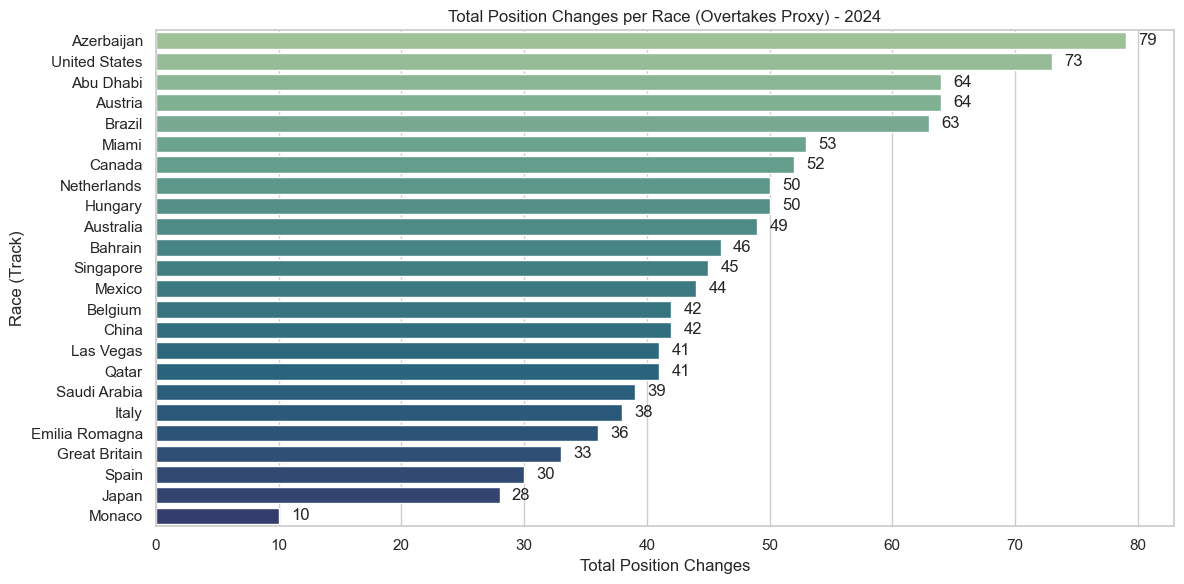

In [370]:
# Ensure Race Position and Starting Grid are numeric
race_results_df["Race Position"] = pd.to_numeric(race_results_df["Position"], errors="coerce")
race_results_df["Starting Grid"] = pd.to_numeric(race_results_df["Starting Grid"], errors="coerce")

# Drop rows with NaN values in position columns
race_results_df = race_results_df.dropna(subset=["Race Position", "Starting Grid"])

# Calculate position change (positive = lost positions, negative = gained positions)
race_results_df["Pos Change"] = race_results_df["Starting Grid"] - race_results_df["Race Position"]

# Total absolute position changes per race (using 'Track' instead of 'Round')
overtakes_per_race = race_results_df.groupby("Track")["Pos Change"].apply(lambda x: x.abs().sum()).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=overtakes_per_race.values, y=overtakes_per_race.index, palette="crest")

# Annotate bars
for i, (val, label) in enumerate(zip(overtakes_per_race.values, overtakes_per_race.index)):
    plt.text(val + 1, i, int(val), va='center')

plt.title("Total Position Changes per Race (Overtakes Proxy) - 2024")
plt.xlabel("Total Position Changes")
plt.ylabel("Race (Track)")
plt.tight_layout()
plt.show()



## 🚦 Driver of the Day Wins (2024) 🏆

**Driver of the Day (DOTD)** awards during the 2024 season.

* 📊 **Horizontal lines** represent the total DOTD wins per driver.
* 🔵 **Blue dots** mark the exact number of awards for each driver.
* 👤 **Drivers** are listed on the y-axis.
* 🔢 **Number of awards** is shown on the x-axis.
* ➖ Grid lines along the x-axis help compare values easily.
* 📏 The figure size is optimized for readability.


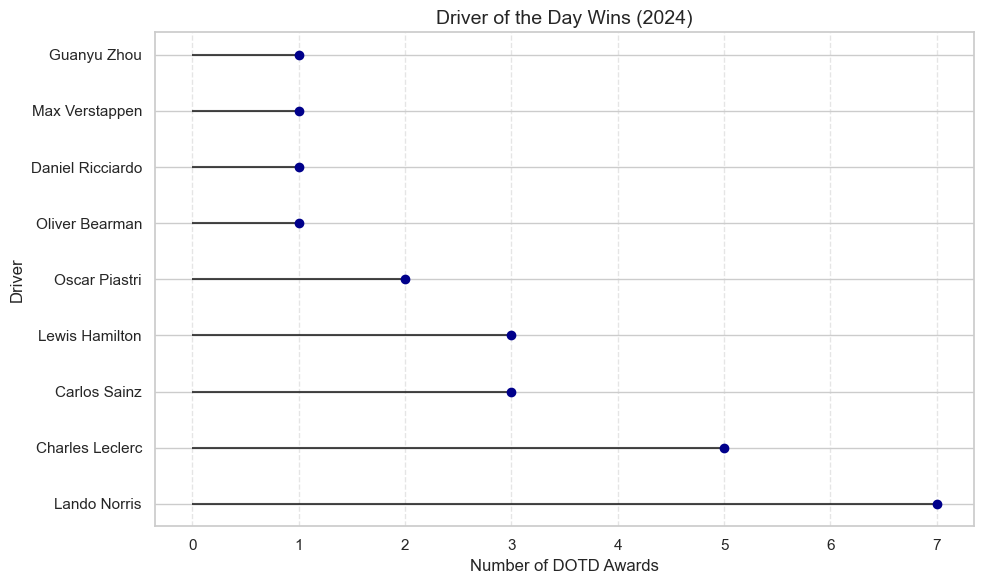

In [372]:
plt.figure(figsize=(10, 6))
dotd_counts = driver_of_day_df["1st Place"].value_counts()
drivers = dotd_counts.index
counts = dotd_counts.values
plt.hlines(y=drivers, xmin=0, xmax=counts, color='black', alpha=0.7)
plt.plot(counts, drivers, "o", color='darkblue')
plt.title("Driver of the Day Wins (2024)", fontsize=14)
plt.xlabel("Number of DOTD Awards")
plt.ylabel("Driver")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 🎯 Fan Favorite vs Performance (2024) 📊

This scatter plot compares drivers’ **total championship points** with their **Driver of the Day (DOTD) wins** during the 2024 season:

- 🔹 Each colored dot represents a driver’s stats.
- 🏷️ Driver names are displayed next to their data points for easy identification.
- 🔴 A red dashed line shows the average number of DOTD wins across all drivers.
- 🗂️ A legend on the right lists all drivers by their color.
- 📈 Helps identify fan-favorite drivers who may have underperformed or overperformed statistically.
- ⚙️ The grid and layout improve readability.


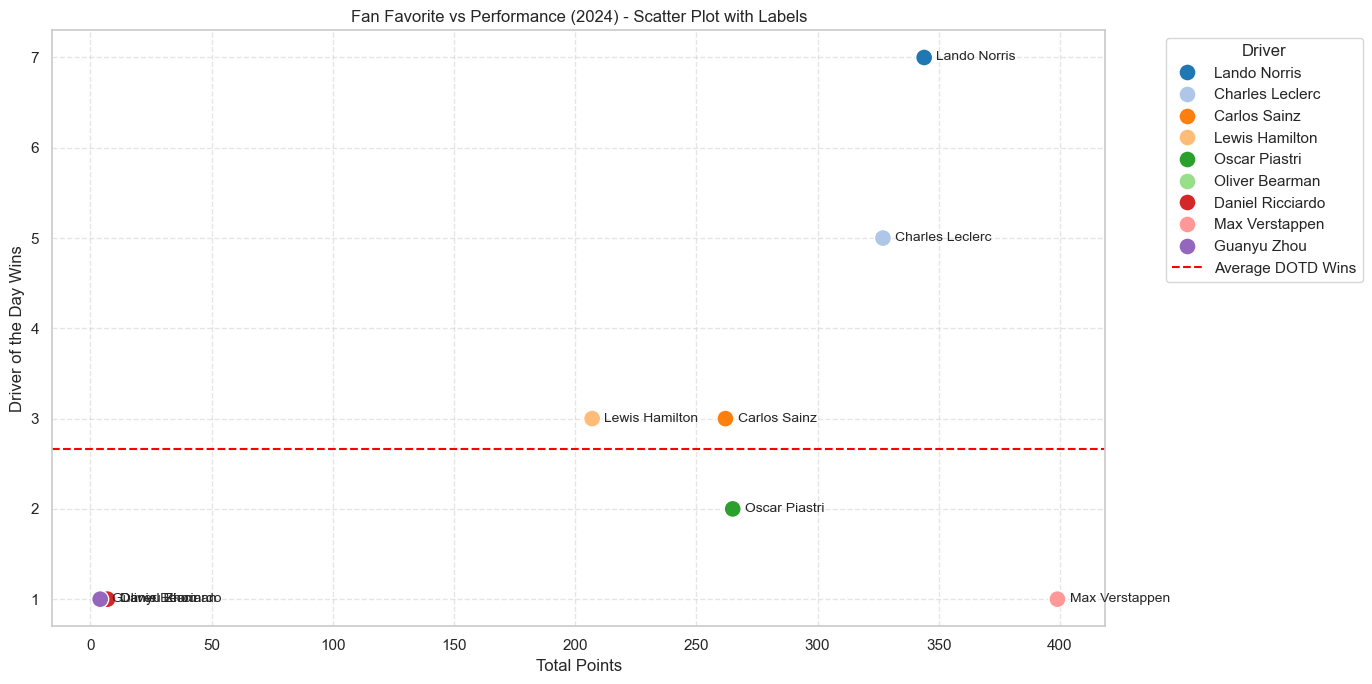

In [374]:
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(data=fan_favs, x="Total Points", y="DOTD Wins", hue="Driver", s=150, palette="tab20")

# Add labels next to points
for i, row in fan_favs.iterrows():
    plt.text(row["Total Points"] + 5, row["DOTD Wins"], row["Driver"], fontsize=10, verticalalignment='center')

plt.axhline(y=fan_favs["DOTD Wins"].mean(), color="red", linestyle="--", label="Average DOTD Wins")
plt.title("Fan Favorite vs Performance (2024) - Scatter Plot with Labels")
plt.xlabel("Total Points")
plt.ylabel("Driver of the Day Wins")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Driver")
plt.show()


## 🔥 Closest Teammate Rivalries (<20 Points Gap) - 2024 🏁

This bar chart highlights the tightest point battles between teammates during the 2024 season:

- 🤼‍♂️ Only teams where the two drivers’ points differ by 20 or fewer are shown.
- 📊 Bars represent total points scored by each driver.
- 🎨 Different colors distinguish teammates within the same team.
- 📉 Helps visualize the most competitive intra-team rivalries.
- ⚙️ Clean layout with clear axis labels and legend.

This insight reveals which teams had the most intense battles between their drivers, often shaping the dynamics of the season.


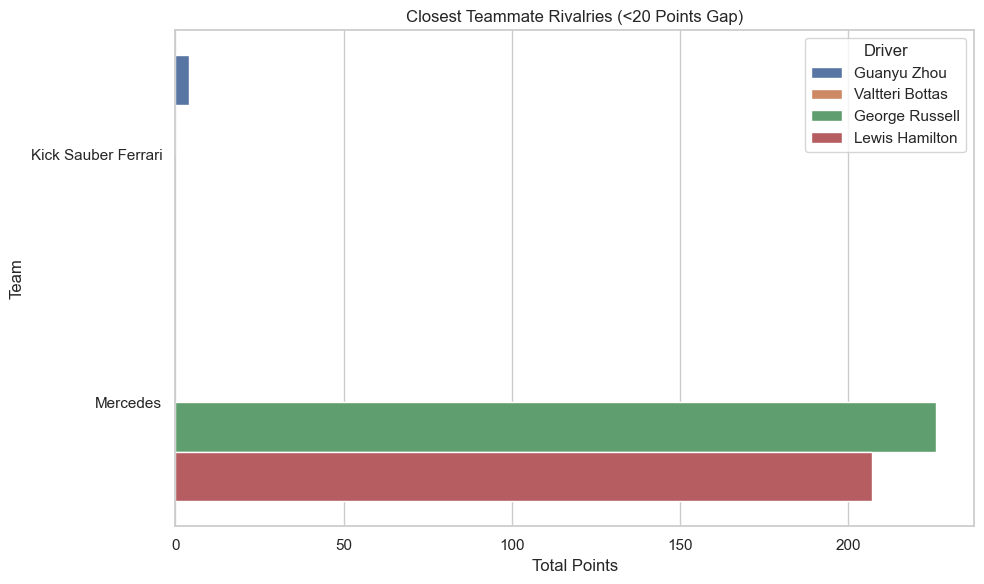

In [376]:
# Points by driver
teammate_points = race_results_df.groupby(["Team", "Driver"])["Points"].sum().reset_index()

# Get top rivalries: drivers with <20-point gap in same team
rivalries = teammate_points.groupby("Team").filter(lambda x: len(x) == 2)
rivalries["Gap"] = rivalries.groupby("Team")["Points"].transform(lambda x: x.max() - x.min())
rivalries_close = rivalries[rivalries["Gap"] <= 20]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=rivalries_close, x="Points", y="Team", hue="Driver", dodge=True)
plt.title("Closest Teammate Rivalries (<20 Points Gap)")
plt.xlabel("Total Points")
plt.ylabel("Team")
plt.tight_layout()
plt.legend(title="Driver")
plt.show()


## 📊 Comparing Driver Performance: 2023 vs 2024 🏎️

This visualization highlights the key performance metrics of the top 10 drivers across two seasons, 2023 and 2024:

* 🔹 **Points**: Total points scored by each driver per season.
* 🏆 **Wins**: Number of race wins achieved.
* 🥉 **Podiums**: Total podium finishes.

The data is presented as grouped bar charts for each metric:

* 🚦 Each driver is listed vertically for clear identification.
* 🎨 Two contrasting color palettes distinguish between 2023 and 2024 values.
* 📅 Side-by-side bars make year-to-year comparisons straightforward.
* 🔍 The layout facilitates quick spotting of performance improvements or declines.
* 📈 Grid lines and legends support easy interpretation of the charts.

This side-by-side comparison reveals evolving rivalries, emerging talents, and consistent champions, offering a comprehensive overview of driver trajectories over the two seasons.

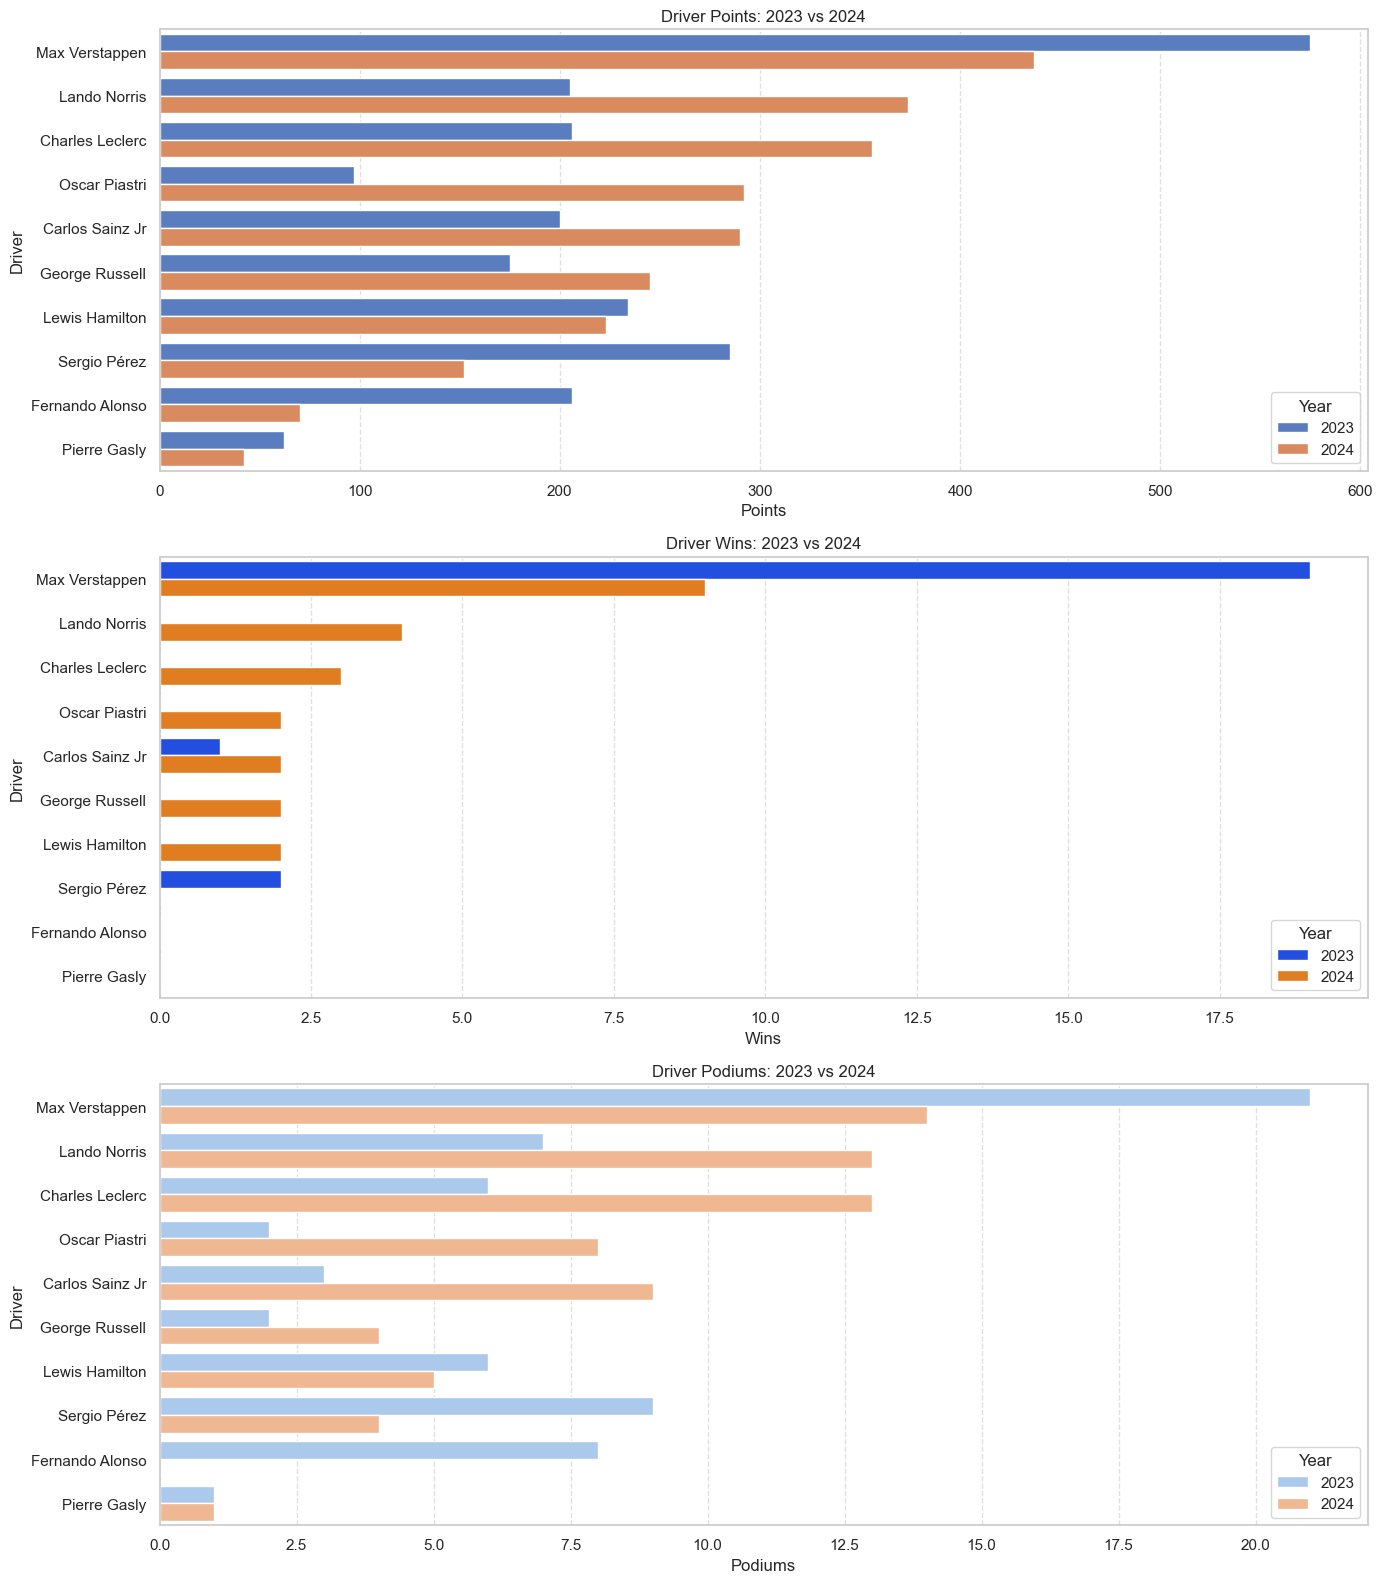

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare the data: manually entered for top 10 drivers (example data)
data = {
    "Driver": [
        "Max Verstappen", "Lando Norris", "Charles Leclerc", "Oscar Piastri",
        "Carlos Sainz Jr", "George Russell", "Lewis Hamilton",
        "Sergio Pérez", "Fernando Alonso", "Pierre Gasly"
    ],
    "Team": [
        "Red Bull", "McLaren", "Ferrari", "McLaren",
        "Ferrari", "Mercedes", "Mercedes",
        "Red Bull", "Aston Martin", "Alpine"
    ],
    "Points_2023": [575, 205, 206, 97, 200, 175, 234, 285, 206, 62],
    "Wins_2023": [19, 0, 0, 0, 1, 0, 0, 2, 0, 0],
    "Podiums_2023": [21, 7, 6, 2, 3, 2, 6, 9, 8, 1],
    "Points_2024": [437, 374, 356, 292, 290, 245, 223, 152, 70, 42],
    "Wins_2024": [9, 4, 3, 2, 2, 2, 2, 0, 0, 0],
    "Podiums_2024": [14, 13, 13, 8, 9, 4, 5, 4, 0, 1]
}

df = pd.DataFrame(data)

# Melt the dataframe for seaborn grouped bar plot
df_points = df.melt(id_vars=["Driver"], value_vars=["Points_2023", "Points_2024"],
                    var_name="Year", value_name="Points")
df_wins = df.melt(id_vars=["Driver"], value_vars=["Wins_2023", "Wins_2024"],
                    var_name="Year", value_name="Wins")
df_podiums = df.melt(id_vars=["Driver"], value_vars=["Podiums_2023", "Podiums_2024"],
                    var_name="Year", value_name="Podiums")

# Map year strings for better x-axis labels
year_map = {"Points_2023": "2023", "Points_2024": "2024",
            "Wins_2023": "2023", "Wins_2024": "2024",
            "Podiums_2023": "2023", "Podiums_2024": "2024"}

df_points["Year"] = df_points["Year"].map(year_map)
df_wins["Year"] = df_wins["Year"].map(year_map)
df_podiums["Year"] = df_podiums["Year"].map(year_map)

# Plot setup
fig, axes = plt.subplots(3, 1, figsize=(14, 16))
sns.set_style("whitegrid")

# Points plot
sns.barplot(data=df_points, x="Points", y="Driver", hue="Year", ax=axes[0], palette="muted")
axes[0].set_title("Driver Points: 2023 vs 2024")
axes[0].set_xlabel("Points")
axes[0].set_ylabel("Driver")

# Wins plot
sns.barplot(data=df_wins, x="Wins", y="Driver", hue="Year", ax=axes[1], palette="bright")
axes[1].set_title("Driver Wins: 2023 vs 2024")
axes[1].set_xlabel("Wins")
axes[1].set_ylabel("Driver")

# Podiums plot
sns.barplot(data=df_podiums, x="Podiums", y="Driver", hue="Year", ax=axes[2], palette="pastel")
axes[2].set_title("Driver Podiums: 2023 vs 2024")
axes[2].set_xlabel("Podiums")
axes[2].set_ylabel("Driver")

# Improve legend and layout
for ax in axes:
    ax.legend(title="Year", loc="lower right")
    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## 🏁 Interactive Formula 1 2024 Race Summary Dashboard 🏎️

Dive into the heart of the 2024 F1 season with this dynamic dashboard, designed to bring race weekends to life:

### Features:

* 🎯 **Select any Grand Prix** from the season with a sleek dropdown menu — instantly update your insights.
* 📊 **Visual Comparison of Top 5 Finishers** showing qualifying vs race positions side-by-side:

  * Bars illustrate how drivers performed from qualifying to the race.
  * Positions inverted on the y-axis for intuitive ranking — lower numbers mean better results.
* 🏆 **Driver of the Day Spotlight**: Instantly see which driver captured fans’ hearts at each event.
* 🌍 **Mapped Track Names** simplify complex GP titles for easy reference.
* 🔍 Interactive and user-friendly, designed for exploration by F1 enthusiasts, analysts, and fans alike.


In [380]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Load datasets
calendar_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_calendar.csv")
driver_of_day_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_driverOfTheDayVotes.csv")
drivers_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_drivers.csv")
qualifying_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_qualifyingResults.csv")
race_results_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_raceResults.csv")
sprint_qualifying_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_sprintQualifyingResults.csv")
sprint_results_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_sprintResults.csv")
teams_df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\Formula1_2024season_teams.csv")

# GP to Track mapping
gp_to_track_map = {
    'Gulf Air Bahrain GP': 'Bahrain',
    'STC Saudi Arabian GP': 'Saudi Arabia',
    'Rolex Australian GP': 'Australia',
    'MSC Cruises Japanese GP': 'Japan',
    'Lenovo Chinese GP': 'China',
    'Crypto.com Miami GP': 'Miami',
    "MSC Cruises Gran Premio Del Made in Italy e Dell'Emilia-Romagna": 'Emilia Romagna',
    'Grand Prix de Monaco': 'Monaco',
    'AWS Grand Prix du Canada': 'Canada',
    'Aramco Gran Premio de España': 'Spain',
    'Qatar Airways Austrian GP': 'Austria',
    'Qatar Airways British GP': 'Great Britain',
    'Hungarian GP': 'Hungary',
    'Rolex Belgian GP': 'Belgium',
    'Heineken Dutch GP': 'Netherlands',
    "Pirelli Gran Premio D'Italia": 'Italy',
    'Qatar Airways Azerbaijan GP': 'Azerbaijan',
    'Singapore Airlines Singapore GP': 'Singapore',
    'Pirelli United States GP': 'United States',
    'Gran Premio de la Ciudad de México': 'Mexico',
    'Lenovo Grande Prêmio de São Paulo': 'Brazil',
    'Heineken Silver Las Vegas GP': 'Las Vegas',
    'Qatar Airways Qatar GP': 'Qatar',
    'Etihad Airways Abu Dhabi GP': 'Abu Dhabi'
}

# Convert 'Position' columns to numeric
race_results_df['Position'] = pd.to_numeric(race_results_df['Position'], errors='coerce')
qualifying_df['Position'] = pd.to_numeric(qualifying_df['Position'], errors='coerce')

# Dropdown options
available_races = calendar_df['GP Name'].tolist()

# Create dropdown widget
race_selector = widgets.Dropdown(
    options=available_races,
    description='Grand Prix:',
    value=available_races[0],
    disabled=False,
)

def plot_race_summary(selected_race):
    try:
        plt.clf()
        mapped_track = gp_to_track_map.get(selected_race, selected_race)

        # Top 5 finishers by position
        top5 = race_results_df[race_results_df['Track'] == mapped_track].nsmallest(5, 'Position')

        # Qualifying positions for these drivers
        quali = qualifying_df[qualifying_df['Track'] == mapped_track][['Driver', 'Position']]
        quali = quali.rename(columns={'Position': 'Qualifying Position'})

        # Merge race results with qualifying
        race_vs_quali = top5.merge(quali, on='Driver', how='left')

        # Plot qualifying vs race positions
        plt.figure(figsize=(10, 5))
        plt.bar(race_vs_quali['Driver'], race_vs_quali['Qualifying Position'], label='Qualifying', color='skyblue')
        plt.bar(race_vs_quali['Driver'], race_vs_quali['Position'], label='Race', alpha=0.7)
        plt.ylabel("Position")
        plt.title(f"Top 5 Finishers at {selected_race}")
        plt.gca().invert_yaxis()  # Better positions on top
        plt.legend()
        plt.grid(True)
        plt.show()

        # Driver of the Day info
        dod = driver_of_day_df[driver_of_day_df['Track'] == mapped_track]
        if not dod.empty:
            first_place_driver = dod.iloc[0]['1st Place']
            print(f"🏆 Driver of the Day (most voted): {first_place_driver}")
        else:
            print("No Driver of the Day data available for this race.")
    except Exception as e:
        print("⚠️ Error in plot_race_summary:", e)

# Display dashboard widgets and output
ui = widgets.VBox([race_selector])
out = widgets.interactive_output(plot_race_summary, {'selected_race': race_selector})
display(ui, out)


Output()

This Jupyter Notebook is designed for a deep dive into the 2024 Formula 1 season analysis. It aims to provide comprehensive insights from various datasets.

**Analysis Areas Covered:**
* **Season Calendar Overview:** Tracks dates and locations of every Grand Prix.
* **Race Results & Championship Standings:** Unpacks race outcomes and championship battle progression.
* **Drivers & Teams:** Provides detailed information on all drivers and their respective teams.
* **Qualifying vs Race Performance:** Compares driver performance in qualifying sessions versus main races.
* **Sprint Results Breakdown:** Analyzes results from sprint races.
* **Driver of the Day Voting Patterns:** Shows fan-voted standout performers.
* **Team Performance Overview:** Evaluates strengths and weaknesses of each constructor.
* **Key Insights & Highlights:** Identifies significant moments and trends of the season.

**Libraries Used:**
The notebook imports `pandas` for data manipulation, `numpy` for numerical operations, `matplotlib.pyplot` and `seaborn` for plotting, and `plotly.express` and `plotly.graph_objects` for interactive visualizations. It also includes `matplotlib.cm` and `matplotlib.colors` for colormaps and `warnings` to filter warnings.

**Datasets Loaded:**
The notebook loads several CSV files for its analysis:
* `Formula1_2024season_calendar.csv`
* `Formula1_2024season_driverOfTheDayVotes.csv`
* `Formula1_2024season_drivers.csv`
* `Formula1_2024season_qualifyingResults.csv`
* `Formula1_2024season_raceResults.csv`
* `Formula1_2024season_sprintQualifyingResults.csv`
* `Formula1_2024season_sprintResults.csv`
* `Formula1_2024season_teams.csv`

**Preview of Dataframes (First 5 rows):**

* **calendar_df:**
    | Round | Race Date  | GP Name              | Country      | City      | Circuit Name                   | First GP | Number of Laps | Circuit Length(km) | Race Distance(km) | Lap Record | Record Owner       | Record Year | Turns | DRS Zones |
    | :---- | :--------- | :------------------- | :----------- | :-------- | :----------------------------- | :------- | :------------- | :----------------- | :---------------- | :--------- | :----------------- | :---------- | :---- | :-------- |
    | 1     | 02/03/2024 | Gulf Air Bahrain GP  | Bahrain      | Sakhir    | Bahrain International Circuit  | 2004     | 57             | 5.412              | 308.238           | 1:31.447   | Pedro de la Rosa   | 2005        | 15    | 3         |
    | 2     | 09/03/2024 | STC Saudi Arabian GP | Saudi Arabia | Jeddah   | Jeddah Corniche Circuit       | 2021     | 50             | 6.174              | 308.450           | 1:30.734   | Lewis Hamilton     | 2021        | 27    | 3         |
    | 3     | 24/03/2024 | Rolex Australian GP  | Australia    | Melbourne | Albert Park Grand Prix Circuit | 1996     | 58             | 5.278              | 306.124           | 1:19.813   | Charles Leclerc    | 2024        | 14    | 4         |
    | 4     | 07/04/2024 | MSC Cruises Japanese GP | Japan        | Suzuka    | Suzuka Circuit                 | 1987     | 53             | 5.807              | 307.471           | 1:30.983   | Lewis Hamilton     | 2019        | 18    | 1         |
    | 5     | 21/04/2024 | Lenovo Chinese GP    | China        | Shanghai  | Shanghai International Circuit | 2004     | 56             | 5.451              | 305.066           | 1:32.238   | Michael Schumacher | 2004        | 16    | 2         |
   

* **driver_of_day_df:**
    | Track        | 1st Place      | 1st Place(%) | 2nd Place      | 2nd Place(%) | 3rd Place     | 3rd Place(%) | 4th Place       | 4th Place(%) | 5th Place      | 5th Place(%) |
    | :----------- | :------------- | :----------- | :------------- | :----------- | :------------ | :----------- | :-------------- | :----------- | :------------- | :----------- |
    | Bahrain      | Carlos Sainz   | 31.4         | Max Verstappen | 13.3         | Sergio Perez  | 11.4         | Charles Leclerc | 8.0          | Lando Norris   | 5.2          |
    | Saudi Arabia | Oliver Bearman | 48.3         | Lewis Hamilton | 7.3          | Kevin Magnussen | 6.7          | Sergio Perez    | 5.9          | Lando Norris   | 5.2          |
    | Australia    | Carlos Sainz   | 38.4         | Lando Norris   | 11.6         | Oscar Piastri | 10.2         | Charles Leclerc | 8.7          | Max Verstappen | 5.5          |
    | Japan        | Charles Leclerc | 23.8         | Yuki Tsunoda   | 17.7         | Carlos Sainz  | 14.6         | Sergio Perez    | 8.3          | Lando Norris   | 8.0          |
    | China        | Lando Norris   | 26.4         | Lewis Hamilton | 13.9         | Fernando Alonso | 13.6         | Charles Leclerc | 9.0          | Max Verstappen | 6.3          |
   

* **drivers_df:**
    | Driver          | Abbreviation | No | Team            | Country        | Podiums | Points | Grands Prix Entered | World Championships | Highest Race Finish | Highest Grid Position | Date of Birth | Place of Birth     |
    | :-------------- | :----------- | :-- | :-------------- | :------------- | :------ | :----- | :------------------ | :------------------ | :------------------ | :-------------------- | :------------ | :----------------- |
    | Max Verstappen  | VER          | 1  | Red Bull Racing | Netherlands    | 112     | 3023.5 | 209                 | 4                   | 1(x63)              | 1                     | 30/09/1997    | Hasselt, Belgium   |
    | Lando Norris    | NOR          | 4  | McLaren         | United Kingdom | 26      | 1007.0 | 128                 | 0                   | 1(x4)               | 1                     | 13/11/1999    | Bristol, England   |
    | Charles Leclerc | LEC          | 16 | Ferrari         | Monaco         | 43      | 1430.0 | 149                 | 0                   | 1(x8)               | 1                     | 16/10/1997    | Monte Carlo, Monaco |
    | Oscar Piastri   | PIA          | 81 | McLaren         | Australia      | 10      | 389.0  | 46                  | 0                   | 1(x2)               | 2                     | 06/04/2001    | Melbourne, Victoria |
    | Carlos Sainz    | SAI          | 55 | Ferrari         | Spain          | 27      | 1272.5 | 208                 | 0                   | 1(x4)               | 1                     | 01/09/1994    | Madrid, Spain      |
   

* **qualifying_df:**
    | Track   | Position | No | Driver          | Team                       | Q1       | Q2       | Q3       | Laps |
    | :------ | :------- | :-- | :-------------- | :------------------------- | :------- | :------- | :------- | :--- |
    | Bahrain | 1        | 1  | Max Verstappen  | Red Bull Racing Honda RBPT | 1:30.031 | 1:29.374 | 1:29.179 | 17   |
    | Bahrain | 2        | 16 | Charles Leclerc | Ferrari                    | 1:30.243 | 1:29.165 | 1:29.407 | 19   |
    | Bahrain | 3        | 63 | George Russell  | Mercedes                   | 1:30.350 | 1:29.922 | 1:29.485 | 17   |
    | Bahrain | 4        | 55 | Carlos Sainz    | Ferrari                    | 1:29.909 | 1:29.573 | 1:29.507 | 18   |
    | Bahrain | 5        | 11 | Sergio Perez    | Red Bull Racing Honda RBPT | 1:30.221 | 1:29.932 | 1:29.537 | 17   |
   

* **race_results_df:**
    | Track   | Position | No | Driver          | Team                       | Starting Grid | Laps | Time/Retired | Points | Set Fastest Lap | Fastest Lap Time |
    | :------ | :------- | :-- | :-------------- | :------------------------- | :------------ | :--- | :----------- | :----- | :-------------- | :--------------- |
    | Bahrain | 1        | 1  | Max Verstappen  | Red Bull Racing Honda RBPT | 1             | 57   | 1:31:44.742  | 26     | Yes             | 1:32.608         |
    | Bahrain | 2        | 11 | Sergio Perez    | Red Bull Racing Honda RBPT | 5             | 57   | +22.457      | 18     | No              | 1:34.364         |
    | Bahrain | 3        | 55 | Carlos Sainz    | Ferrari                    | 4             | 57   | +25.110      | 15     | No              | 1:34.507         |
    | Bahrain | 4        | 16 | Charles Leclerc | Ferrari                    | 2             | 57   | +39.669      | 12     | No              | 1:34.090         |
    | Bahrain | 5        | 63 | George Russell  | Mercedes                   | 3             | 57   | +46.788      | 10     | No              | 1:35.065         |
   

* **sprint_qualifying_df:**
    | Track | Position | No | Driver        | Team               | Q1       | Q2       | Q3       | Laps |
    | :---- | :------- | :-- | :------------ | :----------------- | :------- | :------- | :------- | :--- |
    | China | 1        | 4  | Lando Norris  | McLaren Mercedes   | 1:36.384 | 1:36.047 | 1:57.940 | 13   |
    | China | 2        | 44 | Lewis Hamilton | Mercedes           | 1:37.181 | 1:36.287 | 1:59.201 | 15   |
    | China | 3        | 14 | Fernando Alonso | Aston Martin Aramco Mercedes | 1:36.883 | 1:36.119 | 1:59.915 | 14   |
    | China | 4        | 1  | Max Verstappen | Red Bull Racing Honda RBPT | 1:36.456 | 1:35.606 | 2:00.028 | 12   |
    | China | 5        | 55 | Carlos Sainz  | Ferrari            | 1:36.719 | 1:36.052 | 2:00.214 | 15   |
   

* **sprint_results_df:**
    | Track | Position | No | Driver        | Team                       | Starting Grid | Laps | Time/Retired | Points |
    | :---- | :------- | :-- | :------------ | :------------------------- | :------------ | :--- | :----------- | :----- |
    | China | 1        | 1  | Max Verstappen | Red Bull Racing Honda RBPT | 4             | 19   | 32:04.660    | 8      |
    | China | 2        | 44 | Lewis Hamilton | Mercedes                   | 2             | 19   | +13.043      | 7      |
    | China | 3        | 11 | Sergio Perez  | Red Bull Racing Honda RBPT | 6             | 19   | +15.258      | 6      |
    | China | 4        | 16 | Charles Leclerc | Ferrari                    | 7             | 19   | +17.486      | 5      |
    | China | 5        | 55 | Carlos Sainz  | Ferrari                    | 5             | 19   | +20.696      | 4      |
   

* **teams_df:**
    | Team          | Full Team Name                  | Base                      | Team Chief            | Technical Chief                  | Chassis  | Power Unit | First Team Entry | World Championships | Highest Race Finish | Pole Positions | Fastest Laps |
    | :------------ | :------------------------------ | :------------------------ | :-------------------- | :------------------------------- | :------- | :--------- | :--------------- | :------------------ | :------------------ | :------------- | :----------- |
    | McLaren       | McLaren Formula 1 Team          | Woking, United Kingdom    | Andrea Stella         | Peter Prodromou / Neil Houldey   | MCL38    | Mercedes   | 1966             | 9                   | 1(x189)             | 164            | 172          |
    | Ferrari       | Scuderia Ferrari HP             | Maranello, Italy          | Frédéric Vasseur      | Loic Serra / Enrico Gualtieri    | SF-24    | Ferrari    | 1950             | 16                  | 1(x249)             | 253            | 263          |
    | Red Bull Racing | Oracle Red Bull Racing          | Milton Keynes, United Kingdom | Christian Horner      | Pierre Waché                     | RB20     | Honda RBPT | 1997             | 6                   | 1(x122)             | 103            | 99           |
    | Mercedes      | Mercedes-AMG Petronas F1 Team   | Brackley, United Kingdom  | Toto Wolff            | James Allison                    | W15      | Mercedes   | 1970             | 8                   | 1(x120)             | 133            | 100          |
    | Aston Martin  | Aston Martin Aramco F1 Team     | Silverstone, United Kingdom | Mike Crack            | Bob Bell                         | AMR24    | Mercedes   | 2018             | 0                   | 1(x1)               | 1              | 3            |
    | Alpine        | BWT Alpine F1 Team              | Enstone, United Kingdom   | Oliver Oakes          | David Sanchez                    | A524     | Renault    | 1986             | 2                   | 1(x21)              | 20             | 16           |
    | Haas          | MoneyGram Haas F1 Team          | Kannapolis, United States | Ayao Komatsu          | Andrea De Zordo                  | VF-24    | Ferrari    | 2016             | 0                   | 4(x1)               | 1              | 3            |
    | RB            | Visa Cash App RB Formula One Team | Faenza, Italy             | Laurent Mekies        | Jody Egginton                    | VCARB 01 | Honda RBPT | 1985             | 0                   | 1(x2)               | 1              | 4            |
    | Williams      | Williams Racing                 | Grove, United Kingdom     | James Vowles          | Pat Fry                          | FW46     | Mercedes   | 1978             | 9                   | 1(x114)             | 128            | 133          |
    | Kick Sauber   | Stake F1 Team Kick Sauber       | Hinwil, Switzerland       | Alessandro Alunni Bravi | James Key                        | C44      | Ferrari    | 1993             | 0                   | 1(x1)               | 1              | 7            |
   





## 2024 Formula One Season: Final Verdict

The 2024 Formula One season was a landmark year, culminating in **Max Verstappen** securing his fourth consecutive World Drivers' Championship with Red Bull Racing-Honda RBPT. However, a significant shift occurred in the Constructors' Championship, where **McLaren-Mercedes** clinched their ninth World Constructors' Championship, marking a dominant resurgence in the sport.

**Key Takeaways from the Season:**

* **Verstappen's Continued Dominance:** Max Verstappen reinforced his position as a generational talent, consistently delivering top performances to secure the drivers' title.
* **McLaren's Resurgence:** McLaren-Mercedes showed exceptional form throughout the season, demonstrating strong car development and strategic execution, which ultimately led them to their first Constructors' title in over two decades. Their drivers, Lando Norris (runner-up) and Oscar Piastri, were key to this success.
* **Ferrari's Strong Challenge:** Ferrari, with Charles Leclerc finishing third in the drivers' standings, proved to be a formidable contender, pushing the front-runners and often providing thrilling battles.
* **Highly Contested Season:** The season was contested over a record twenty-four Grands Prix, showcasing the global reach and competitive nature of Formula 1. The detailed race results, qualifying performances, and sprint outcomes highlighted the intense competition across the grid.

**Insights from the Analysis Notebook (`2024F1season.analysis.ipynb`):**

The analysis notebook was designed to delve into various facets of the 2024 season, including:

* **Race Results & Championship Standings:** The notebook aimed to track the progression of the championship battle, which aligns with the observed outcomes of Verstappen's individual success and McLaren's team victory.
* **Qualifying vs. Race Performance:** This analysis would have shed light on how teams and drivers translated their Saturday speed into Sunday race pace, a critical factor in McLaren's consistent performance.
* **Team Performance Overview:** The comprehensive datasets would allow for a detailed evaluation of each constructor's strengths and weaknesses, further explaining McLaren's ascendancy and Red Bull's strong, albeit not constructors' championship-winning, performance.
* **Driver of the Day Trends:** The fan voting patterns would provide insights into which drivers consistently impressed the audience with their on-track heroics, regardless of their final position.

In essence, the 2024 Formula One season was defined by Max Verstappen's continued individual brilliance and McLaren's remarkable return to the top of the constructors' championship, making it a season of both established dominance and a significant shift in team power. The extensive data captured throughout the season, as outlined in the analysis notebook, provides a rich foundation for understanding these dynamics.